# Uncorking Insights: A Data Analysis of Iowa's Liquor Sales Landscape

## Executive Summary



This report analyzes liquor sales data for the state of Iowa from January 2021 through January 2022. The key objectives were to identify trends, understand customer purchasing behavior, evaluate sales performance across products and locations, and explore pricing strategitability in Iowa going forward.

### Major Findings

- The top liquor categories by sales volume were American Vodkas, Canadian Whiskies, Straight Bourbon Whiskies, and Whiskey Liqueurs. These traditional spirit types dominate the Iowa market.

- Aggregate sales numbers varied significantly across retail stores, with high volume chains like Hy-Vee and independent sellers like Benz Distributing recording the highest totals. 

- Sales peaked around major events/holidays like the Iowa State Fair in August, Halloween in October, and Veterans Day in November, indicating promotional/stocking opportunities.

- The cities with the highest per capita liquor sales were major metropolitan areas like Des Moines, Cedar Rapids, and Davenport.

- The top selling liquor brands/vendors by revenue included major labels like Diageo, Sazerac, and Luxco.

- There was a positive correlation between higher retail prices and higher sales dollars, suggesting consumers are willing to pay more for premium/popular liquor brands.

- The average liquor transaction was $164 for roughly 12 bottles.  

### Key Recommendations

- Focus marketing/promotions for top categories like vodkas and whiskies, especially around major events.

- Evaluate store allocation and pricing in top performing cities to maximize revenue.

- Analyze pack size profitability to stock optimal offerings from top liquor brands.  

- Implement pricing strategies that allow for healthy margins on premium product lines that drive consumer demand.

This analysis provides valuable insights to inform pricing, marketing, inventory and operational strategies to grow liquor sales and profitability.

## Project Description


To gain a comprehensive understanding of the liquor sales landscape in Iowa, enabling data-driven strategies to optimize operations, inventory management, and marketing initiatives. This analysis aims to provide valuable insights into consumer preferences, regional variations, and market dynamics within the state's liquor industry. The objectives of this project are:

1. Identify emerging trends and patterns in liquor sales across different product categories, brands, and pack sizes, allowing for informed decision-making regarding inventory stocking and promotional efforts.

2. Evaluate the impact of pricing strategies on sales volume and profitability, guiding the development of optimal pricing models that balance revenue generation and consumer demand.

3. Assess regional variations in liquor consumption and purchasing behavior, empowering targeted marketing campaigns and tailored product offerings to effectively cater to local preferences.

4. Analyze the influence of external factors, such as holidays, events, and seasonality, on liquor sales, facilitating proactive inventory management and promotional planning.

5. Pinpoint top-performing retail locations and channels, enabling strategic resource allocation and potential expansion or optimization of the distribution network.

By leveraging the insights gained from this comprehensive data alcoholic beverage companynesses in Iowa can make informed decisions to streamline operations, enhance profitability, and deliver a superior customer experience. The findings will serve as a valuable roadmap for crafting effective strategies across various facets, including product assortment, pricing, marketing, and supply chain management, ultimately driving sustainable growth and cementing a competitive advantaIowathin the state's liquor market.

## Sidebar and Data Sources

I conducted a comprehensive analysis of the Iowa Liquor Sales dataset, which encompasses sales data from January 2021 to January 2022. 
The dataset contains of ~ 3M rows and 24 columns. The columns are:
1) **invoice_and_item_number:** concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order.
2) **date:** date of order.
3) **store_number:** unique number assigned to the store who ordered the liquor.
4) **store_name:** name of store who ordered the liquor.
5) **address:** address of store who ordered the liquor.
6) city: city where the store who ordered the liquor is located.
7) **zip_code:** zip code where the store who ordered the liquor is located.
8) **store_location:** location of store who ordered the liquor. The address, city, state and zip code are geocoded to provide geographic coordinates.
9) **county_number:** iowa county number for the county where store who ordered the liquor is located.
10) **county:** county where the store who ordered the liquor is located.
11) **category:** category code associated with the liquor ordered.
12) **category_name:** category of the liquor ordered.
13) **vendor_number:** the vendor number of the company for the brand of liquor ordered.
14) **vendor_name:** the vendor name of the company for the brand of liquor ordered.
15) **item_number:** item number for the individual liquor product ordered.
16) **item_description:** description of the individual liquor product ordered.
17) **pack:** the number of bottles in a case for the liquor ordered.
18) **bottle_volume_ml:** volume of each liquor bottle ordered in milliliters.
19) **state_bottle_cost:** the amount that alcoholic beverages division paid for each bottle of liquor ordered.
20) **state_bottle_retail:** the amount the store paid for each bottle of liquor ordered.
21) **bottles_sold:** the number of bottles of liquor ordered by the store.
22) **sale_dollars:** total cost of liquor order (number of bottles multiplied by the state bottle retail).
23) **volume_sold_liters:** total volume of liquor ordered in liters. (i.e. (bottle volume (ml) x bottles sold)/1,000).
24) **volume_sold_gallons:** total volume of liquor ordered in gallons. (i.e. (bottle volume (ml) x bottles sold)/3785.411784).

The objective of this analysis was to derive actionable insights to inform strategic decision-making and optimization efforts within the liquor distribution and retail industry in Iowa.

Please note that certain details within this data analysis report, such as specific store names or vendor information, have been intentionally altered or omitted to maintain confidentiality and safeguard proprietary information of the businesses involved. These modifications have been made in accordance with confidentiality protocols to ensure the protection of sensitive data and maintain the privacy of the companies' operations.

Unless otherwise stated, the primary data source used for this analysis is [data.iowa.gov](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy) accessed through [Gabriel Ramos on Kaggle](https://www.kaggle.com/datasets/gabrielramos87/iowa-sales-liquor-jan-2021jan-2022).

The analysis and recommendations presented in this report are based solely on the provided datasets and publicly available information. No proprietary or confidential data from liquor distribution companies or retailers was accessed or utilized in the course of this project.

### Importing libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading data:

In [5]:
liquor_sales=pd.read_csv('Iowa Liquor Sales (Jan 2021-Jan 2022).csv')
liquor_sales.head(2)

invoice_and_item_number        date  store_number  \
0         INV-33179700135  2021-01-04          2576   
1         INV-33196200106  2021-01-04          2649   

                             store_name         address        city  zip_code  \
0  Hy-Vee Wine and Spirits / Storm Lake  1250 N Lake St  Storm Lake   50588.0   
1                   Hy-Vee #3 / Dubuque   400 Locust St     Dubuque   52001.0   

                         store_location  county_number      county  ...  \
0  POINT (-95.200758 42.65318400000001)           11.0  BUENA VIST  ...   
1  POINT (-90.666497 42.49721900000001)           31.0     DUBUQUE  ...   

   item_number           item_description  pack bottle_volume_ml  \
0        64870  Fireball Cinnamon Whiskey    48              100   
1        65200       Tequila Rose Liqueur    12              750   

   state_bottle_cost state_bottle_retail  bottles_sold  sale_dollars  \
0                0.9                1.35            48          64.8   
1               11.5               17.25             4          69.0   

   volume_sold_liters  volume_sold_gallons  
0                 4.8                 1.26  
1                 3.0                 0.79  

[2 rows x 24 columns]

## Exploratory Data Analysis

### Checking the shape of the data

In [6]:
liquor_sales.shape
print(f'Shape of the data: {liquor_sales.shape}')
print(f'There are {liquor_sales.shape[0]} rows in the data and {liquor_sales.shape[1]} columns.')

Shape of the data: (2805307, 24)
There are 2805307 rows in the data and 24 columns.


### Creating a randomized sample from the dataset
A dataset with 2,805,307 rows is a huge and could give us computational challenges in our data analysis projec.  

Therefore, we will create a randomized sample dataset from it.

For a population size of 2,805,307 and a desired margin of error of 1% with a confidence level of 95%, let's calculate the minimum recommended sample size.

In [7]:
# Population size
N = 2805307

# Margin of error (1%)
margin_of_error = 0.01

# Z-score for 95% confidence level
confidence_level = 0.95
Z = stats.norm.ppf((1 + confidence_level) / 2)

# Standard deviation (assuming 0.5 for a conservative estimate)
sigma = 0.5

# Calculate sample size
n = ((Z ** 2) * (sigma ** 2)) / (margin_of_error ** 2)

In [8]:
n

9603.647051735314

In [9]:
round(n)

9604

In [10]:
# To get 9604 random rows
sample_liquor_sales = liquor_sales.sample(n=9604)
sample_liquor_sales.to_csv('Sample_Liquor_Sales Iowa (Jan 2021-Jan 2022).csv', index=False)

In [11]:
df = pd.read_csv('Sample_Liquor_Sales Iowa (Jan 2021-Jan 2022).csv')
df.head(2)

invoice_and_item_number        date  store_number             store_name  \
0         INV-33474300008  2021-01-15          4023  Wal-Mart 1389 / Boone   
1         INV-41131800115  2021-10-19          2651       Hy-Vee / Waverly   

               address     city  zip_code                store_location  \
0  1515 SE Marshall St    Boone   50036.0  POINT (-93.869892 42.035093)   
1     1311 4 Street SW  Waverly   50677.0  POINT (-92.475403 42.712263)   

   county_number  county  ...  item_number item_description  pack  \
0            8.0   BOONE  ...        11788     Black Velvet     6   
1            9.0  BREMER  ...        89230       1800 Anejo     6   

  bottle_volume_ml  state_bottle_cost state_bottle_retail  bottles_sold  \
0             1750              10.45               15.68             6   
1              750              22.41               33.62             2   

   sale_dollars  volume_sold_liters  volume_sold_gallons  
0         94.08                10.5                 2.77  
1         67.24                 1.5                 0.39  

[2 rows x 24 columns]

## Data Cleaning
### Checking the data types in the dataset

In [12]:
df.shape
print(f'Shape of the data: {df.shape}')
print(f'There are {df.shape[0]} rows in the data and {df.shape[1]} columns.')

Shape of the data: (9604, 24)
There are 9604 rows in the data and 24 columns.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9604 entries, 0 to 9603
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  9604 non-null   object 
 1   date                     9604 non-null   object 
 2   store_number             9604 non-null   int64  
 3   store_name               9604 non-null   object 
 4   address                  9604 non-null   object 
 5   city                     9604 non-null   object 
 6   zip_code                 9604 non-null   float64
 7   store_location           8475 non-null   object 
 8   county_number            9604 non-null   float64
 9   county                   9604 non-null   object 
 10  category                 9604 non-null   float64
 11  category_name            9604 non-null   object 
 12  vendor_number            9604 non-null   float64
 13  vendor_name              9604 non-null   object 
 14  item_number             

In [15]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [16]:
df.describe()

store_number      zip_code  county_number      category  vendor_number  \
count   9604.000000   9604.000000    9604.000000  9.604000e+03    9604.000000   
mean    4114.460641  51249.913994      56.753020  1.054288e+06     287.873698   
std     1260.848513    992.618034      27.311072  9.870525e+04     140.088568   
min     2106.000000  50002.000000       1.000000  1.011100e+06      35.000000   
25%     2642.000000  50314.000000      31.000000  1.012100e+06     205.000000   
50%     4159.000000  51040.000000      61.000000  1.031200e+06     260.000000   
75%     5207.000000  52302.000000      77.000000  1.071100e+06     420.000000   
max     9047.000000  57222.000000      99.000000  1.901200e+06     978.000000   

         item_number         pack  bottle_volume_ml  state_bottle_cost  \
count    9604.000000  9604.000000       9604.000000        9604.000000   
mean    55027.902541    11.880571        825.696064          11.349866   
std     95133.517307     7.715619        528.404811          10.216364   
min       447.000000     1.000000         20.000000           0.890000   
25%     27102.000000     6.000000        375.000000           5.660000   
50%     39492.000000    12.000000        750.000000           8.980000   
75%     65204.000000    12.000000       1000.000000          14.100000   
max    999920.000000    60.000000       5250.000000         400.000000   

       state_bottle_retail  bottles_sold  sale_dollars  volume_sold_liters  \
count          9604.000000   9604.000000   9604.000000         9604.000000   
mean             17.025733     11.249063    151.435354            8.846593   
std              15.325372     30.306381    425.286230           36.131517   
min               1.340000      1.000000      2.700000            0.020000   
25%               8.467500      3.000000     41.400000            1.500000   
50%              13.470000      6.000000     86.400000            4.500000   
75%              21.150000     12.000000    162.240000           10.500000   
max             600.000000   1536.000000  18345.600000         2047.500000   

       volume_sold_gallons  
count          9604.000000  
mean              2.331415  
std               9.545176  
min               0.000000  
25%               0.390000  
50%               1.180000  
75%               2.770000  
max             540.890000

<Axes: >

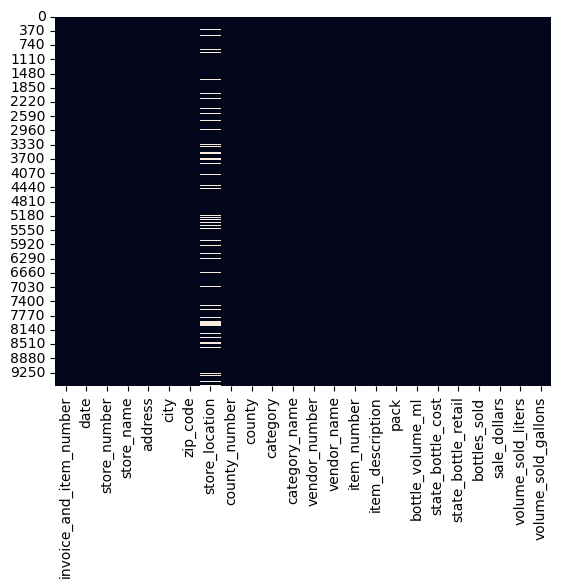

In [17]:
sns.heatmap(df.isnull(), cbar=False)

A significant number of store location data is missing. We will drop the column.

In [18]:
df.drop(columns=['store_location'], inplace=True)

<Axes: >

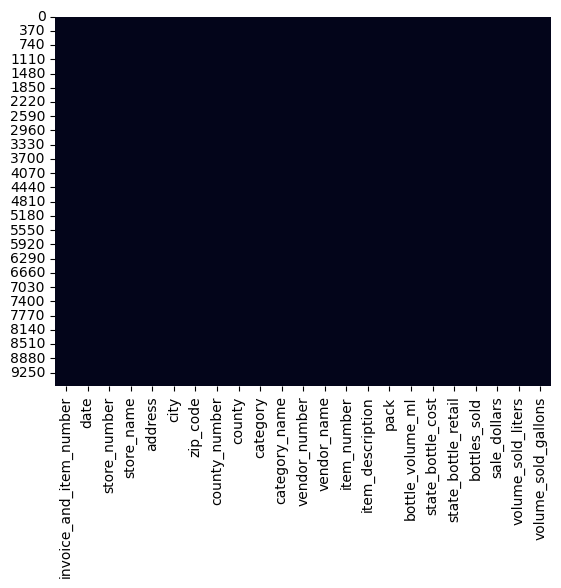

In [19]:
# Updated heatmap
sns.heatmap(df.isnull(), cbar=False)

### Checking for duplicate content

In [20]:
# Total number of duplicated content
df.duplicated().sum()

0

There's no duplicate content.

### Checking for missing values

In [21]:
# Total number of missing values for each column.
df.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

There are no missing values.

In [23]:
df['date'] = pd.to_datetime(df['date'])
df['zip_code'] = df['zip_code'].astype(str)
df['county_number'] = df['county_number'].astype(int)
df['category'] = df['category'].astype(int)
df['vendor_number'] = df['vendor_number'].astype(int)
df['bottle_volume_ml'] = df['bottle_volume_ml'].astype(float)
df['bottles_sold'] = df['bottles_sold'].astype(float)

Updated data types:

In [24]:
df.dtypes

invoice_and_item_number            object
date                       datetime64[ns]
store_number                        int64
store_name                         object
address                            object
city                               object
zip_code                           object
county_number                       int32
county                             object
category                            int32
category_name                      object
vendor_number                       int32
vendor_name                        object
item_number                         int64
item_description                   object
pack                                int64
bottle_volume_ml                  float64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                      float64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               float64
dtype: object

### Dealing with infinity values

In [25]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
df.dropna(subset=["invoice_and_item_number", "date", "store_number", "store_name", "address", "city", "zip_code", "county_number",
                 "county", "category", "category_name", "vendor_number", "vendor_name", "item_number", "item_description", 
                 "pack", "bottle_volume_ml", "state_bottle_cost", "state_bottle_retail", "bottles_sold", "sale_dollars",
                 "volume_sold_liters", "volume_sold_gallons"], inplace=True)

### Checking for outliers

<Axes: >

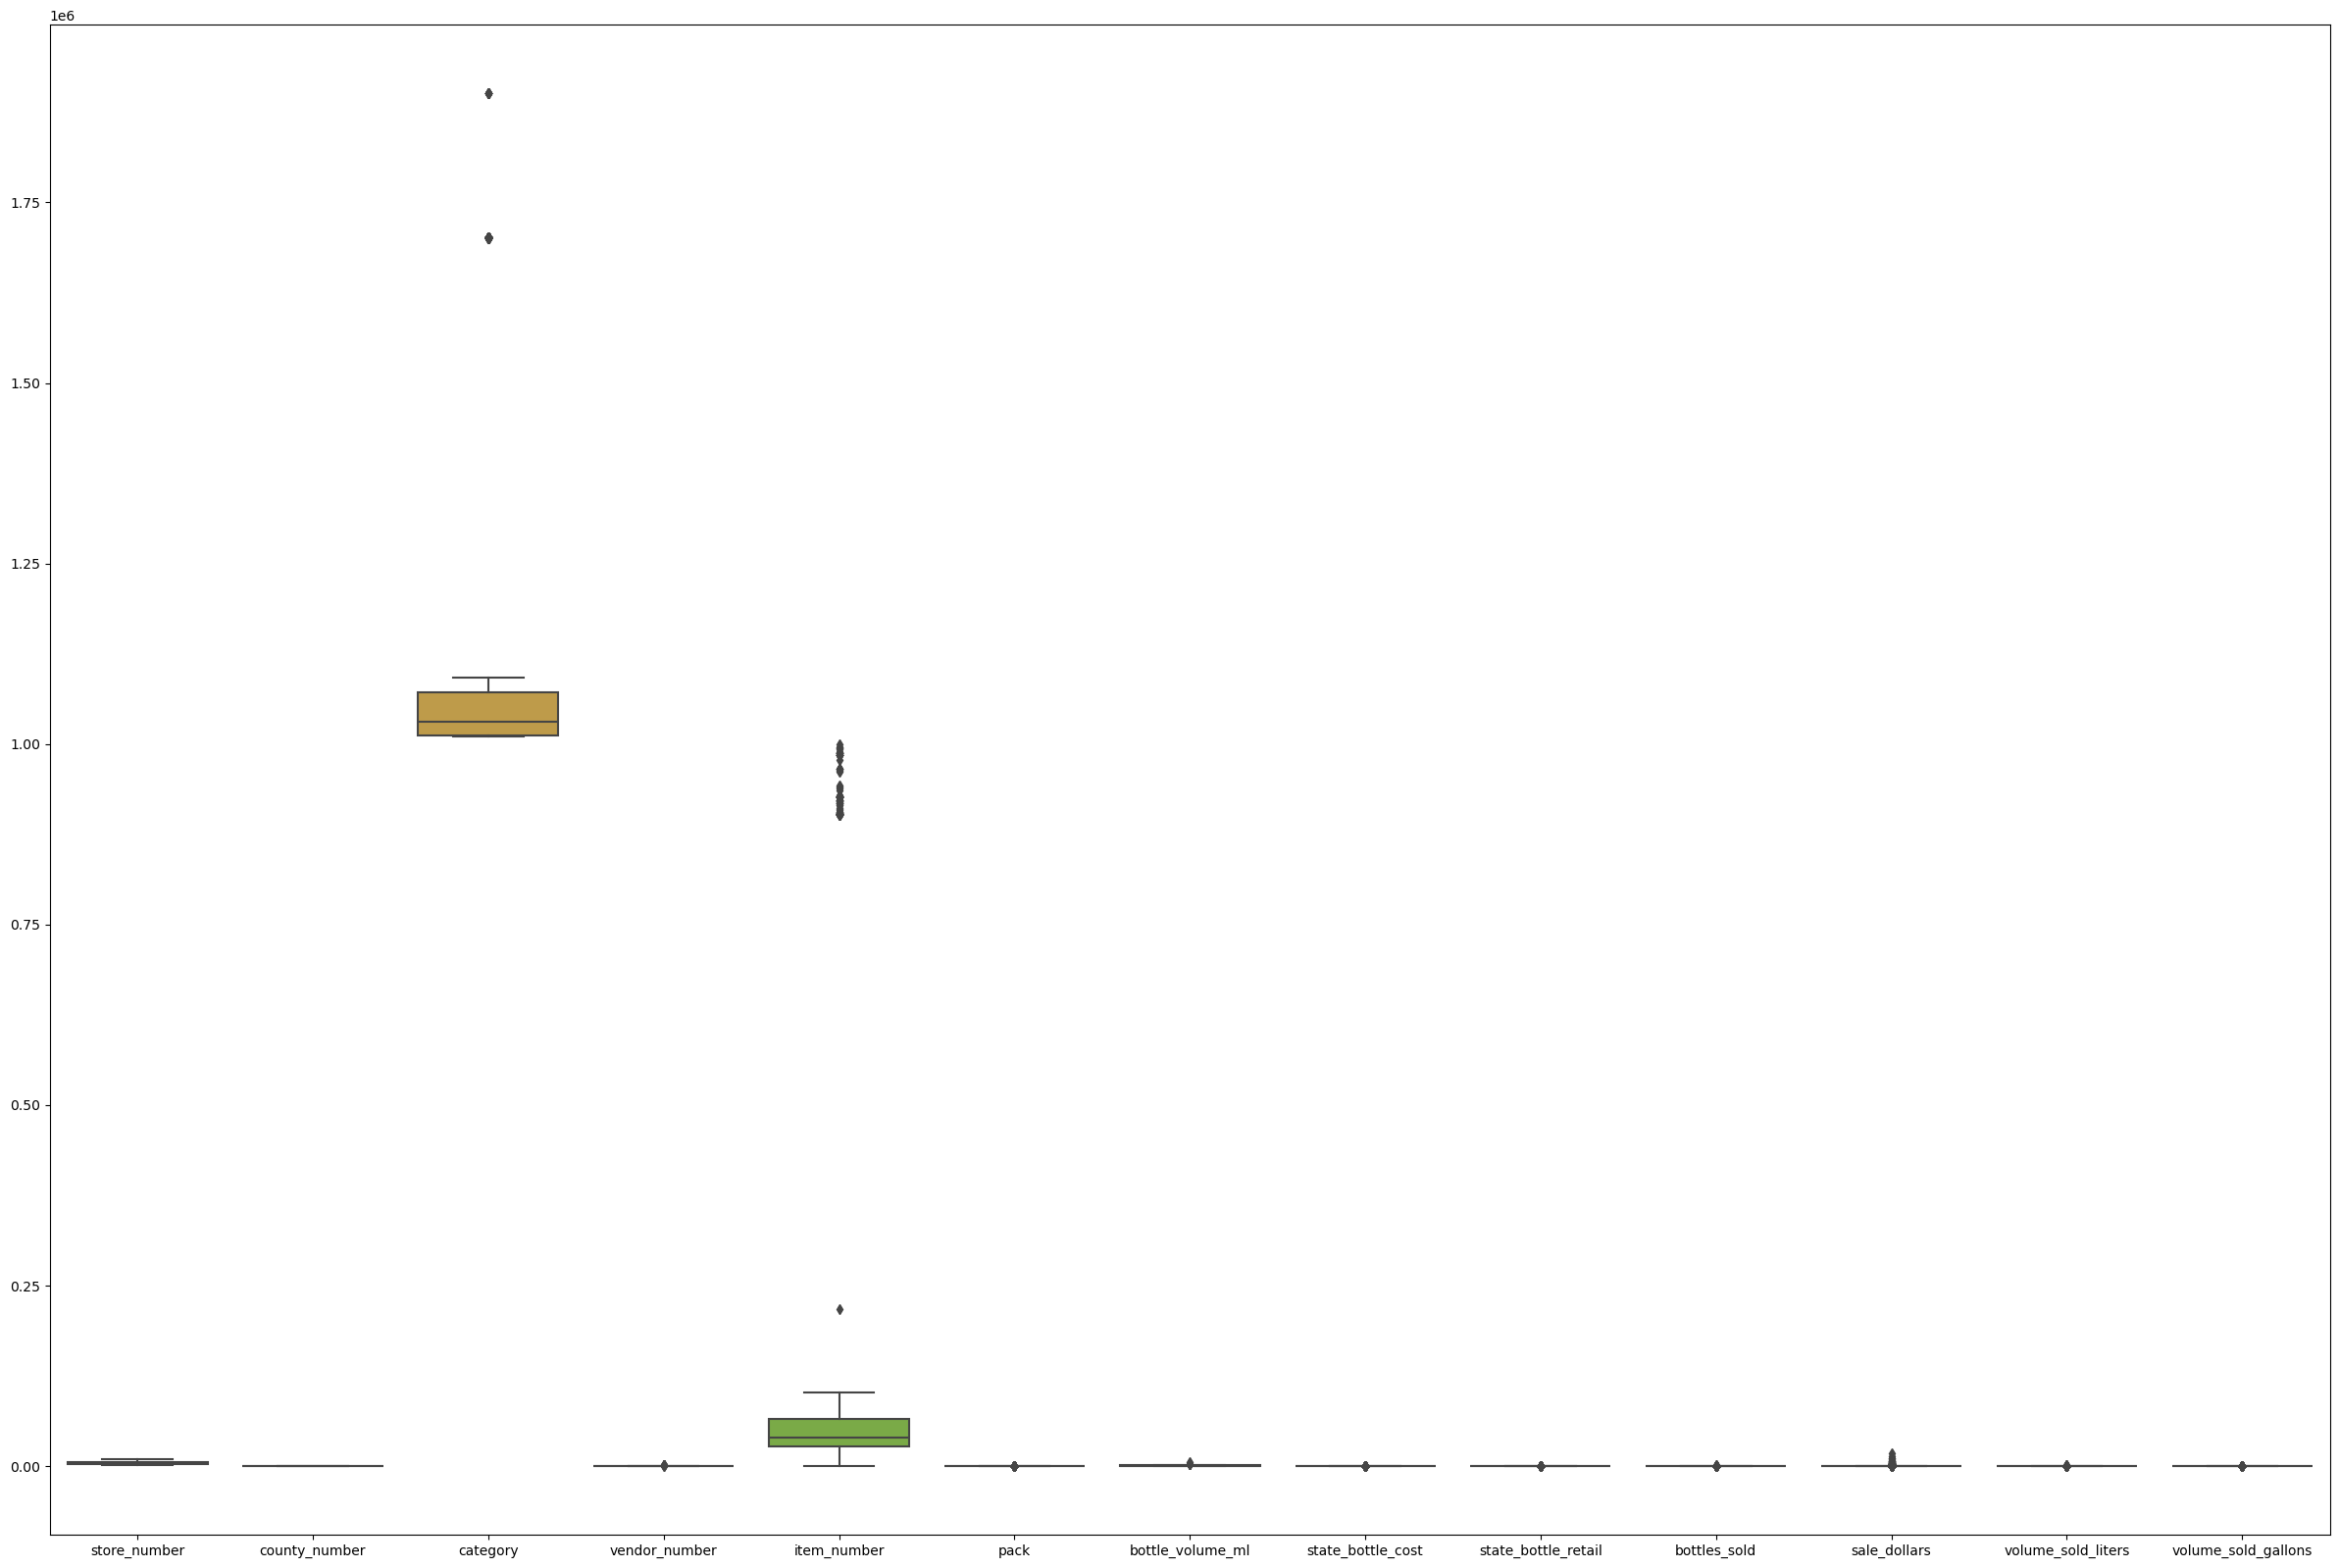

In [29]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(data=df, ax=ax)

In [31]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

<Axes: xlabel='pack', ylabel='Count'>

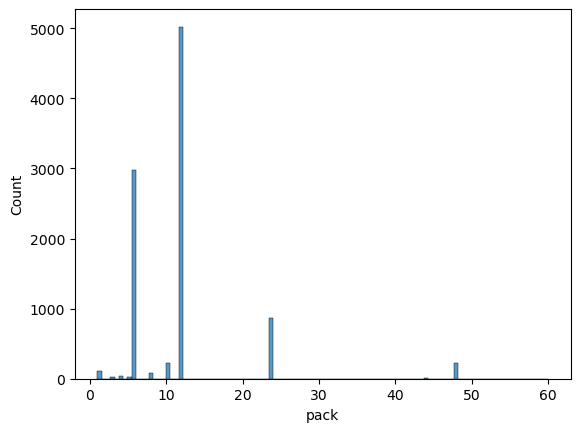

In [39]:
sns.histplot(data=df['pack'])

In [50]:
q1 = df['pack'].quantile(0.25)
q3 = df['pack'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df['pack'] < lower_bound) | (df['pack'] > upper_bound)
outliers.sum()

1115

In [57]:
filtered_df = df[~outliers]

<Axes: xlabel='bottle_volume_ml', ylabel='Count'>

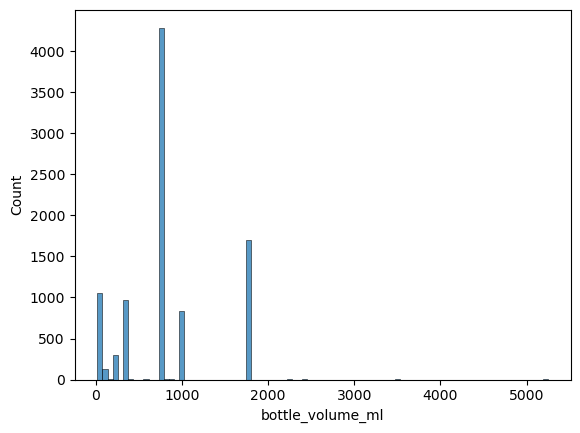

In [58]:
sns.histplot(data=filtered_df['bottle_volume_ml'])

In [61]:
q1 = filtered_df['bottle_volume_ml'].quantile(0.25)
q3 = filtered_df['bottle_volume_ml'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers2 = (filtered_df['bottle_volume_ml'] < lower_bound) | (filtered_df['bottle_volume_ml'] > upper_bound)
outliers2.sum()

7

In [65]:
filtered_df2 = filtered_df[~outliers2]

<Axes: xlabel='state_bottle_retail', ylabel='Count'>

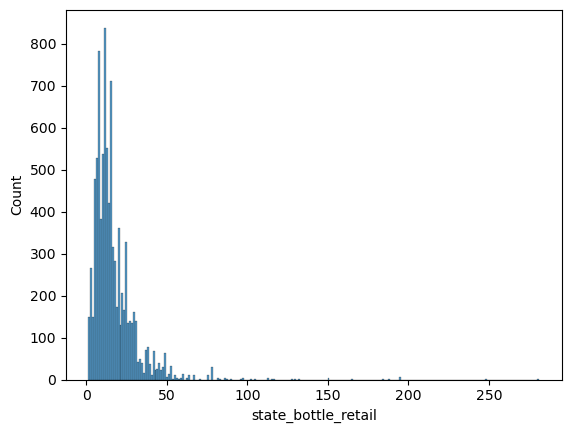

In [66]:
sns.histplot(data=filtered_df2['state_bottle_retail'])

In [64]:
q1 = filtered_df2['state_bottle_retail'].quantile(0.25)
q3 = filtered_df2['state_bottle_retail'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers3 = (filtered_df2['state_bottle_retail'] < lower_bound) | (filtered_df2['state_bottle_retail'] > upper_bound)
outliers3.sum()

476

In [68]:
filtered_df3 = filtered_df2[~outliers3]

<Axes: xlabel='bottles_sold', ylabel='Count'>

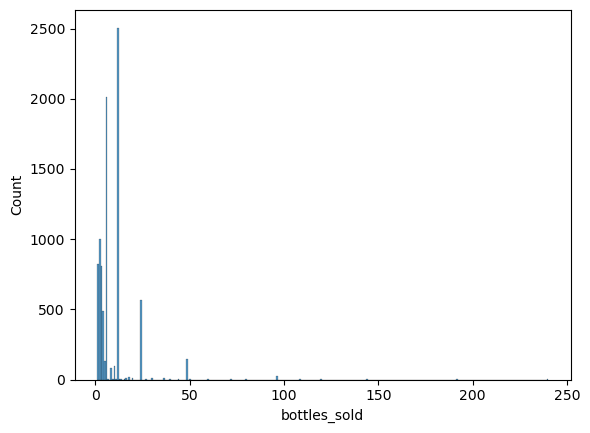

In [69]:
sns.histplot(data=filtered_df3['bottles_sold'])

In [70]:
q1 = filtered_df3['bottles_sold'].quantile(0.25)
q3 = filtered_df3['bottles_sold'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers4 = (filtered_df3['bottles_sold'] < lower_bound) | (filtered_df3['bottles_sold'] > upper_bound)
outliers4.sum()

228

In [71]:
filtered_df4 = filtered_df3[~outliers4]

<Axes: xlabel='sale_dollars', ylabel='Count'>

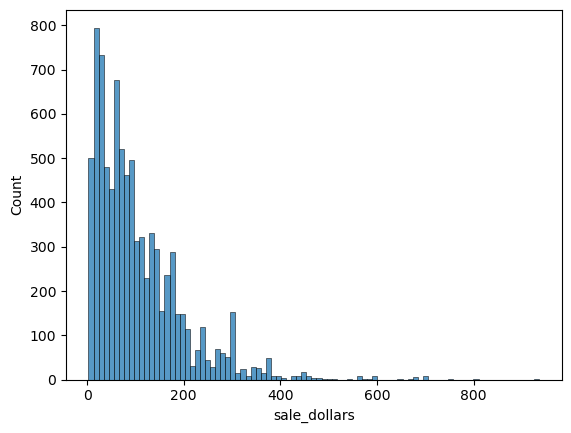

In [72]:
sns.histplot(data=filtered_df4['sale_dollars'])

In [73]:
q1 = filtered_df4['sale_dollars'].quantile(0.25)
q3 = filtered_df4['sale_dollars'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers5 = (filtered_df4['sale_dollars'] < lower_bound) | (filtered_df4['sale_dollars'] > upper_bound)
outliers5.sum()

276

In [74]:
filtered_df5 = filtered_df4[~outliers5]

<Axes: xlabel='volume_sold_liters', ylabel='Count'>

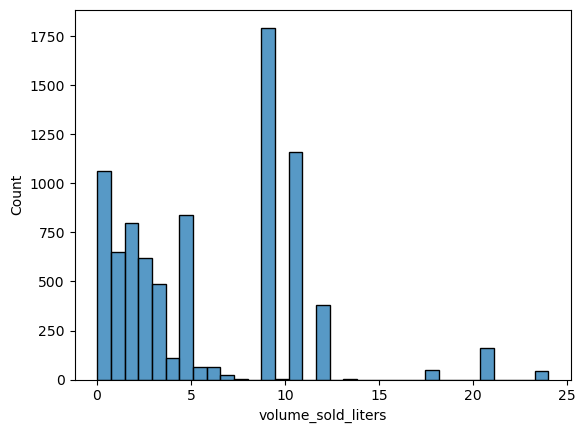

In [75]:
sns.histplot(data=filtered_df5['volume_sold_liters'])

In [76]:
q1 = filtered_df5['volume_sold_liters'].quantile(0.25)
q3 = filtered_df5['volume_sold_liters'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers6 = (filtered_df5['volume_sold_liters'] < lower_bound) | (filtered_df5['volume_sold_liters'] > upper_bound)
outliers6.sum()

203

In [77]:
filtered_df6 = filtered_df5[~outliers6]

<Axes: xlabel='volume_sold_gallons', ylabel='Count'>

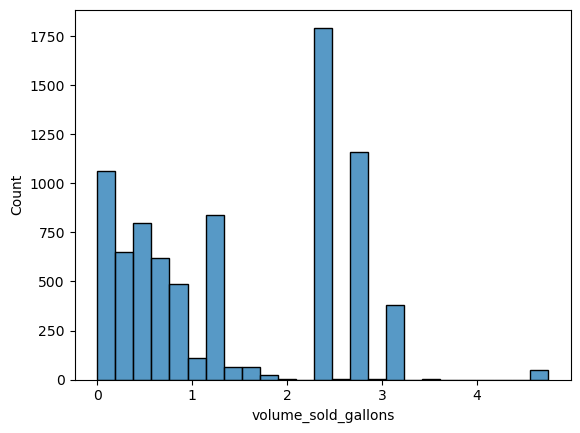

In [78]:
sns.histplot(data=filtered_df6['volume_sold_gallons'])

In [79]:
q1 = filtered_df6['volume_sold_gallons'].quantile(0.25)
q3 = filtered_df6['volume_sold_gallons'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers7 = (filtered_df6['volume_sold_gallons'] < lower_bound) | (filtered_df6['volume_sold_gallons'] > upper_bound)
outliers7.sum()

0

In [80]:
# Saving the data without outliers
filtered_df7 = filtered_df6[~outliers7]
liquor_data=filtered_df7
liquor_data.to_csv('No_Outliers_Sample_Liquor_Sales Iowa (Jan 2021-Jan 2022).csv', index=False)

## Data Analysis

#### Loading and reading data

In [81]:
ldf=pd.read_csv('No_Outliers_Sample_Liquor_Sales Iowa (Jan 2021-Jan 2022).csv')
ldf.head(2)

invoice_and_item_number        date  store_number             store_name  \
0         INV-33474300008  2021-01-15          4023  Wal-Mart 1389 / Boone   
1         INV-41131800115  2021-10-19          2651       Hy-Vee / Waverly   

               address     city  zip_code  county_number  county  category  \
0  1515 SE Marshall St    Boone   50036.0              8   BOONE   1012100   
1     1311 4 Street SW  Waverly   50677.0              9  BREMER   1022200   

   ... item_number  item_description pack  bottle_volume_ml state_bottle_cost  \
0  ...       11788      Black Velvet    6            1750.0             10.45   
1  ...       89230        1800 Anejo    6             750.0             22.41   

   state_bottle_retail  bottles_sold  sale_dollars  volume_sold_liters  \
0                15.68           6.0         94.08                10.5   
1                33.62           2.0         67.24                 1.5   

   volume_sold_gallons  
0                 2.77  
1                 0.39  

[2 rows x 23 columns]

In [83]:
ldf.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
county_number                int64
county                      object
category                     int64
category_name               object
vendor_number                int64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml           float64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold               float64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

##### We need to change several data types in the data
* date (object to datetime)
* zip_code (float to string)
* county_number (float to integer)
* category (float to integer)
* vendor_number (float to integer)
* bottle_volume_ml (integer to float)
* bottles_sold (integer to float)

In [84]:
ldf['date'] = pd.to_datetime(ldf['date'])
ldf['zip_code'] = ldf['zip_code'].astype(str)
ldf['county_number'] = ldf['county_number'].astype(int)
ldf['category'] = ldf['category'].astype(int)
ldf['vendor_number'] = ldf['vendor_number'].astype(int)
ldf['bottle_volume_ml'] = ldf['bottle_volume_ml'].astype(float)
ldf['bottles_sold'] = ldf['bottles_sold'].astype(float)

#### What are the top twenty most popular liquor categories in Iowa?

In [85]:
ldf['category_name'].value_counts().nlargest(20)

category_name
American Vodkas                 1270
Canadian Whiskies                755
Straight Bourbon Whiskies        567
American Flavored Vodka          422
Blended Whiskies                 392
Whiskey Liqueur                  391
Spiced Rum                       366
American Schnapps                309
Imported Vodkas                  279
Cocktails /RTD                   261
American Cordials & Liqueur      223
Flavored Rum                     217
American Brandies                215
Tennessee Whiskies               198
100% Agave Tequila               196
Imported Cordials & Liqueurs     186
Cream Liqueurs                   180
Imported Flavored Vodka          166
Mixto Tequila                    157
White Rum                        146
Name: count, dtype: int64

[Text(0, 0, 'American Vodkas'),
 Text(0, 1, 'Canadian Whiskies'),
 Text(0, 2, 'Straight Bourbon Whiskies'),
 Text(0, 3, 'American Flavored Vodka'),
 Text(0, 4, 'Blended Whiskies'),
 Text(0, 5, 'Whiskey Liqueur'),
 Text(0, 6, 'Spiced Rum'),
 Text(0, 7, 'American Schnapps'),
 Text(0, 8, 'Imported Vodkas'),
 Text(0, 9, 'Cocktails /RTD'),
 Text(0, 10, 'American Cordials & Liqueur'),
 Text(0, 11, 'Flavored Rum'),
 Text(0, 12, 'American Brandies'),
 Text(0, 13, 'Tennessee Whiskies'),
 Text(0, 14, '100% Agave Tequila'),
 Text(0, 15, 'Imported Cordials & Liqueurs'),
 Text(0, 16, 'Cream Liqueurs'),
 Text(0, 17, 'Imported Flavored Vodka'),
 Text(0, 18, 'Mixto Tequila'),
 Text(0, 19, 'White Rum')]

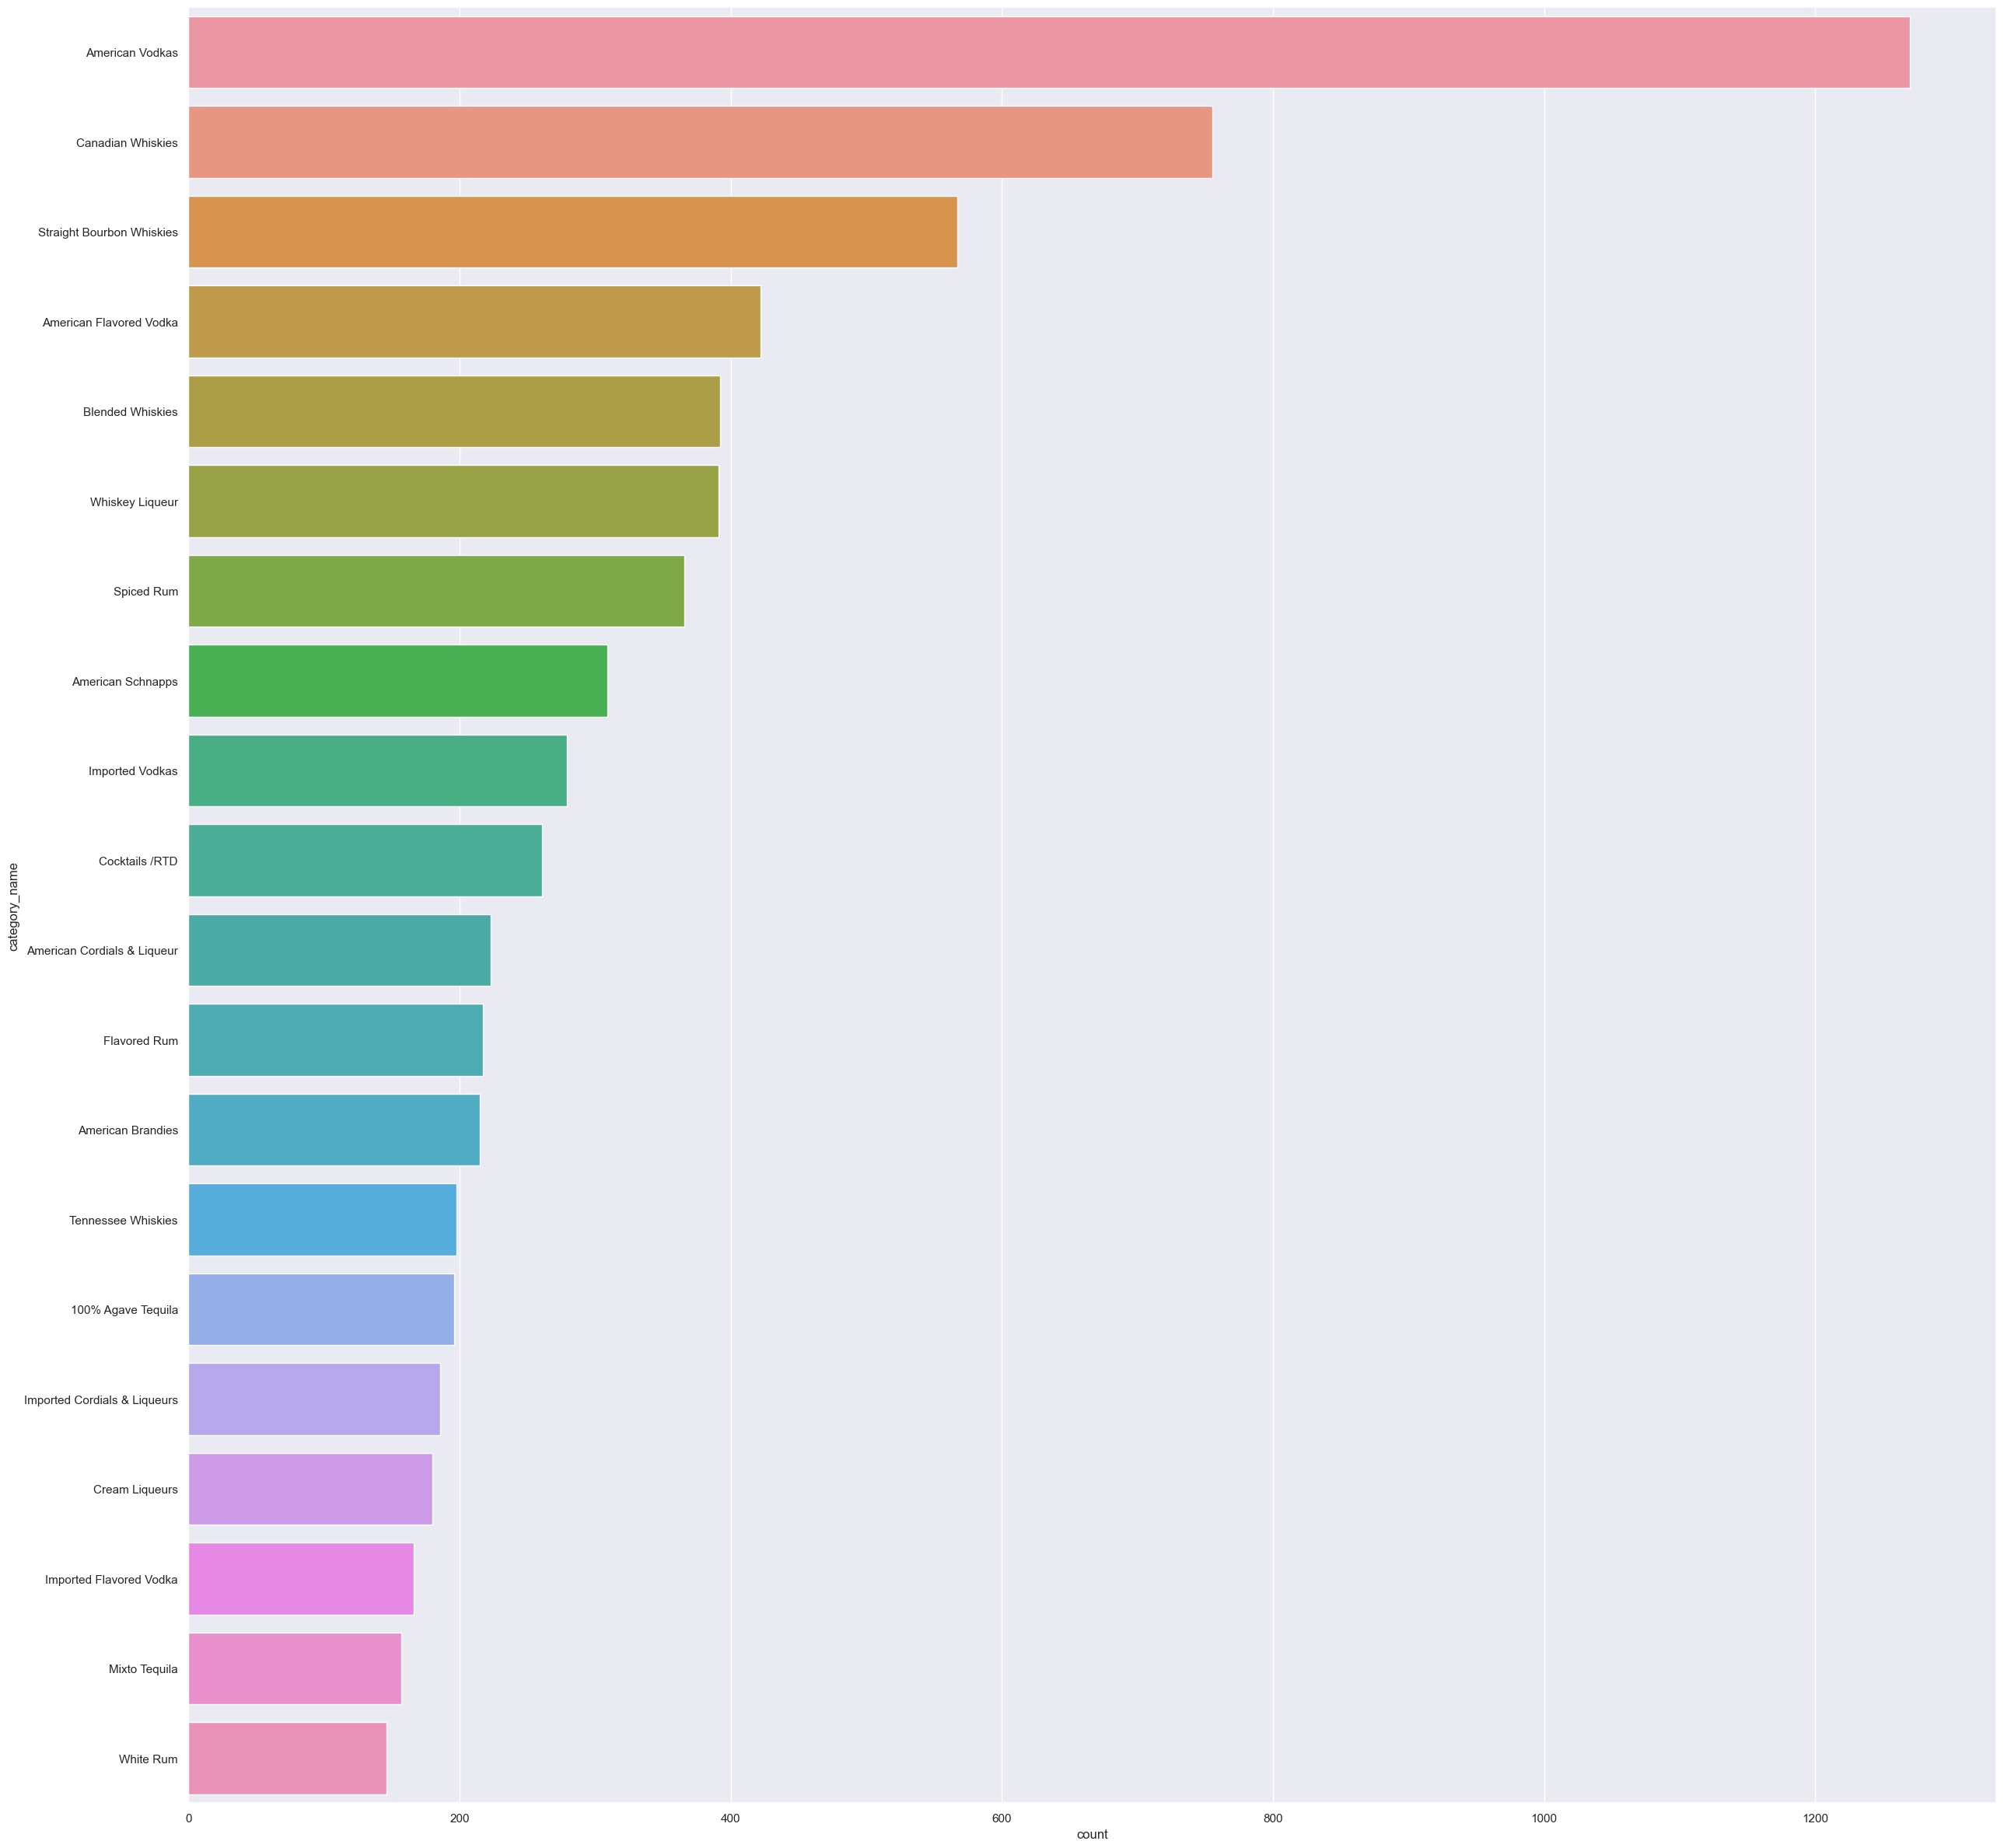

In [86]:
sns.set(style = 'darkgrid')
top_twenty = ldf['category_name'].value_counts().nlargest(20).index
filtered_vendors = ldf[ldf['category_name'].isin(top_twenty)]
fig, ax = plt.subplots(figsize=(30, 30))
sns.countplot(y="category_name", data=filtered_vendors, ax=ax, order=ldf['category_name'].value_counts().nlargest(20).index)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#### Do aggregate sales numbers differ by much between stores?

In [87]:
ldf['store_name'].value_counts().nlargest(20)

store_name
Hy-Vee Food Store / Cedar Falls           52
Hy-Vee Wine and Spirits / WDM             47
Hy-Vee Food and Drug #6 / Cedar Rapids    45
Central City Liquor, Inc.                 44
Hy-Vee Food Store #3 / Sioux City         44
Hy-Vee #3 / BDI / Des Moines              42
Hy-Vee Wine and Spirits / Bettendorf      40
Hy-Vee Food Store / Marion                40
Happy's Wine & Spirits                    40
Hy-Vee #2 / Dubuque                       39
Hy-Vee #4 / WDM                           38
Hy-Vee Food Store #2 / Council Bluffs     36
Hy-Vee #7 / Cedar Rapids                  34
Hy-Vee Food Store #3 / Cedar Rapids       33
Hy-Vee Food Store #1 / Mason City         33
Cyclone Liquors                           33
Hy-Vee #3 / Dubuque                       33
Benz Distributing                         33
Hy-Vee Food Store #2 / State Ankeny       33
Central City 2                            32
Name: count, dtype: int64

[Text(0, 0, 'Hy-Vee Food Store / Cedar Falls'),
 Text(0, 1, 'Hy-Vee Wine and Spirits / WDM'),
 Text(0, 2, 'Hy-Vee Food and Drug #6 / Cedar Rapids'),
 Text(0, 3, 'Central City Liquor, Inc.'),
 Text(0, 4, 'Hy-Vee Food Store #3 / Sioux City'),
 Text(0, 5, 'Hy-Vee #3 / BDI / Des Moines'),
 Text(0, 6, 'Hy-Vee Wine and Spirits / Bettendorf'),
 Text(0, 7, 'Hy-Vee Food Store / Marion'),
 Text(0, 8, "Happy's Wine & Spirits"),
 Text(0, 9, 'Hy-Vee #2 / Dubuque'),
 Text(0, 10, 'Hy-Vee #4 / WDM'),
 Text(0, 11, 'Hy-Vee Food Store #2 / Council Bluffs'),
 Text(0, 12, 'Hy-Vee #7 / Cedar Rapids'),
 Text(0, 13, 'Hy-Vee Food Store #3 / Cedar Rapids'),
 Text(0, 14, 'Hy-Vee Food Store #1 / Mason City'),
 Text(0, 15, 'Cyclone Liquors'),
 Text(0, 16, 'Hy-Vee #3 / Dubuque'),
 Text(0, 17, 'Benz Distributing'),
 Text(0, 18, 'Hy-Vee Food Store #2 / State Ankeny'),
 Text(0, 19, 'Central City 2')]

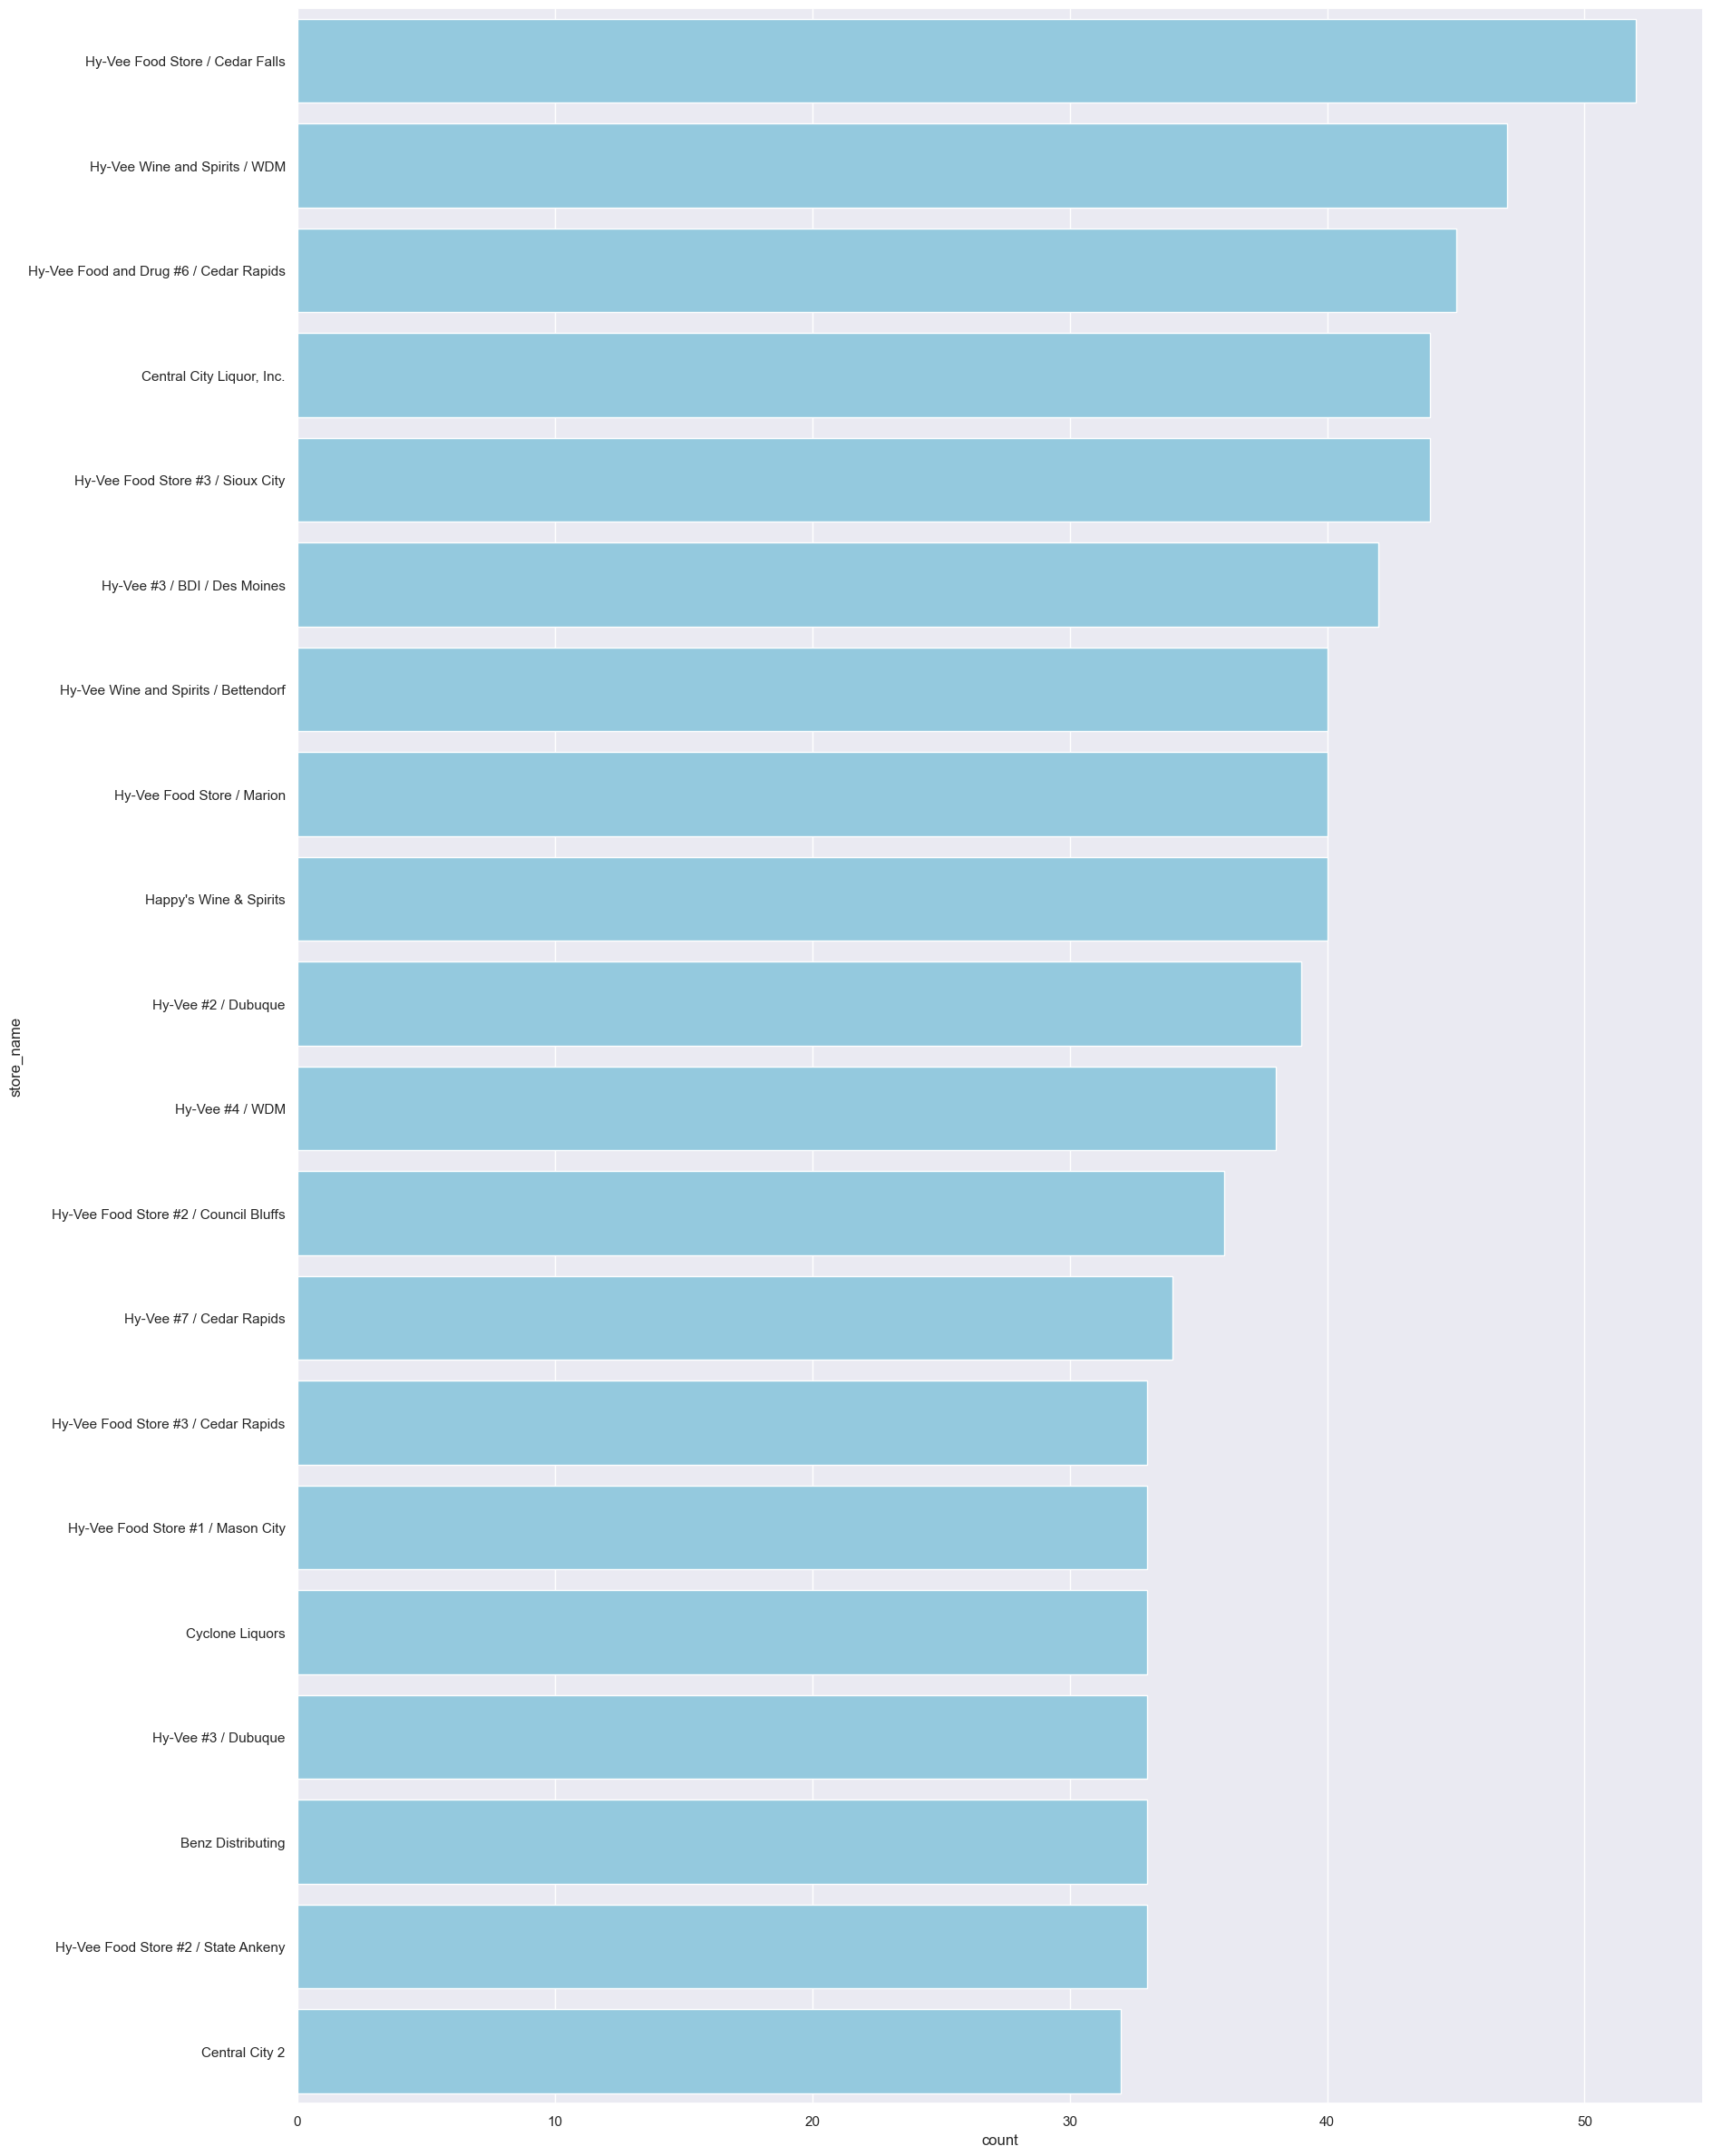

In [88]:
top_twenty_stores = ldf['store_name'].value_counts().nlargest(20).index
filtered_stores = ldf[ldf['store_name'].isin(top_twenty_stores)]
fig, ax = plt.subplots(figsize=(20, 30))
sns.countplot(y="store_name", data=filtered_stores, ax=ax, order=ldf['store_name'].value_counts().nlargest(20).index, color='skyblue')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#### What are the overall trends in liquor sales volume and revenue in Iowa over the period from January 2021 to January 2022?

In [105]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In the dataset that includes outliers, there are spikes in liquor demand February 10, beginning of October, and mid November.

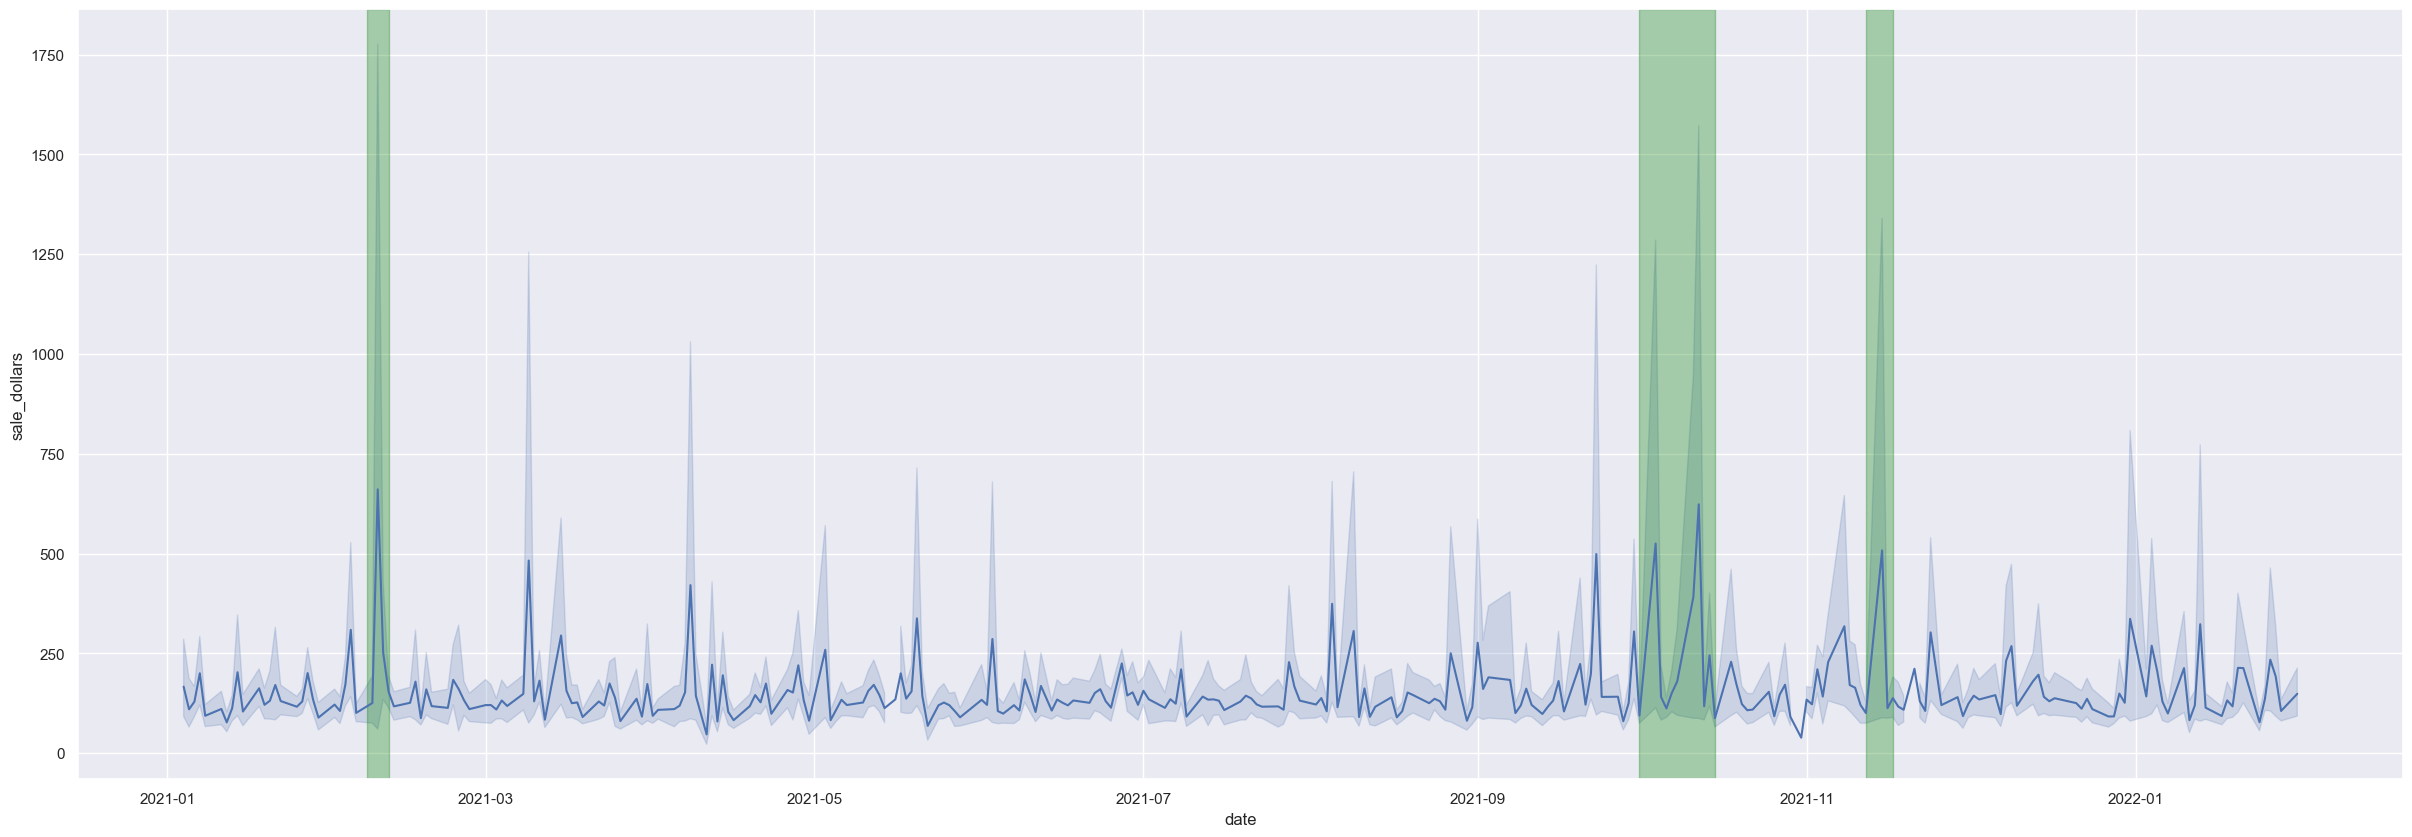

In [119]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(x="date", y="sale_dollars", data=df, ax=ax)
highlight_start_date1 = pd.to_datetime('2021-02-07')
highlight_end_date1 = pd.to_datetime('2021-02-11')
plt.axvspan(highlight_start_date1, highlight_end_date1, color='green', alpha=0.3)
highlight_start_date2 = pd.to_datetime('2021-10-01')
highlight_end_date2 = pd.to_datetime('2021-10-15')
plt.axvspan(highlight_start_date2, highlight_end_date2, color='green', alpha=0.3)
highlight_start_date3 = pd.to_datetime('2021-11-12')
highlight_end_date3 = pd.to_datetime('2021-11-17')
plt.axvspan(highlight_start_date3, highlight_end_date3, color='green', alpha=0.3)
plt.show()

In the dataset with outliers removed, the spikes in liquor demand occur around mid February, end of April, end of June and mid November. 

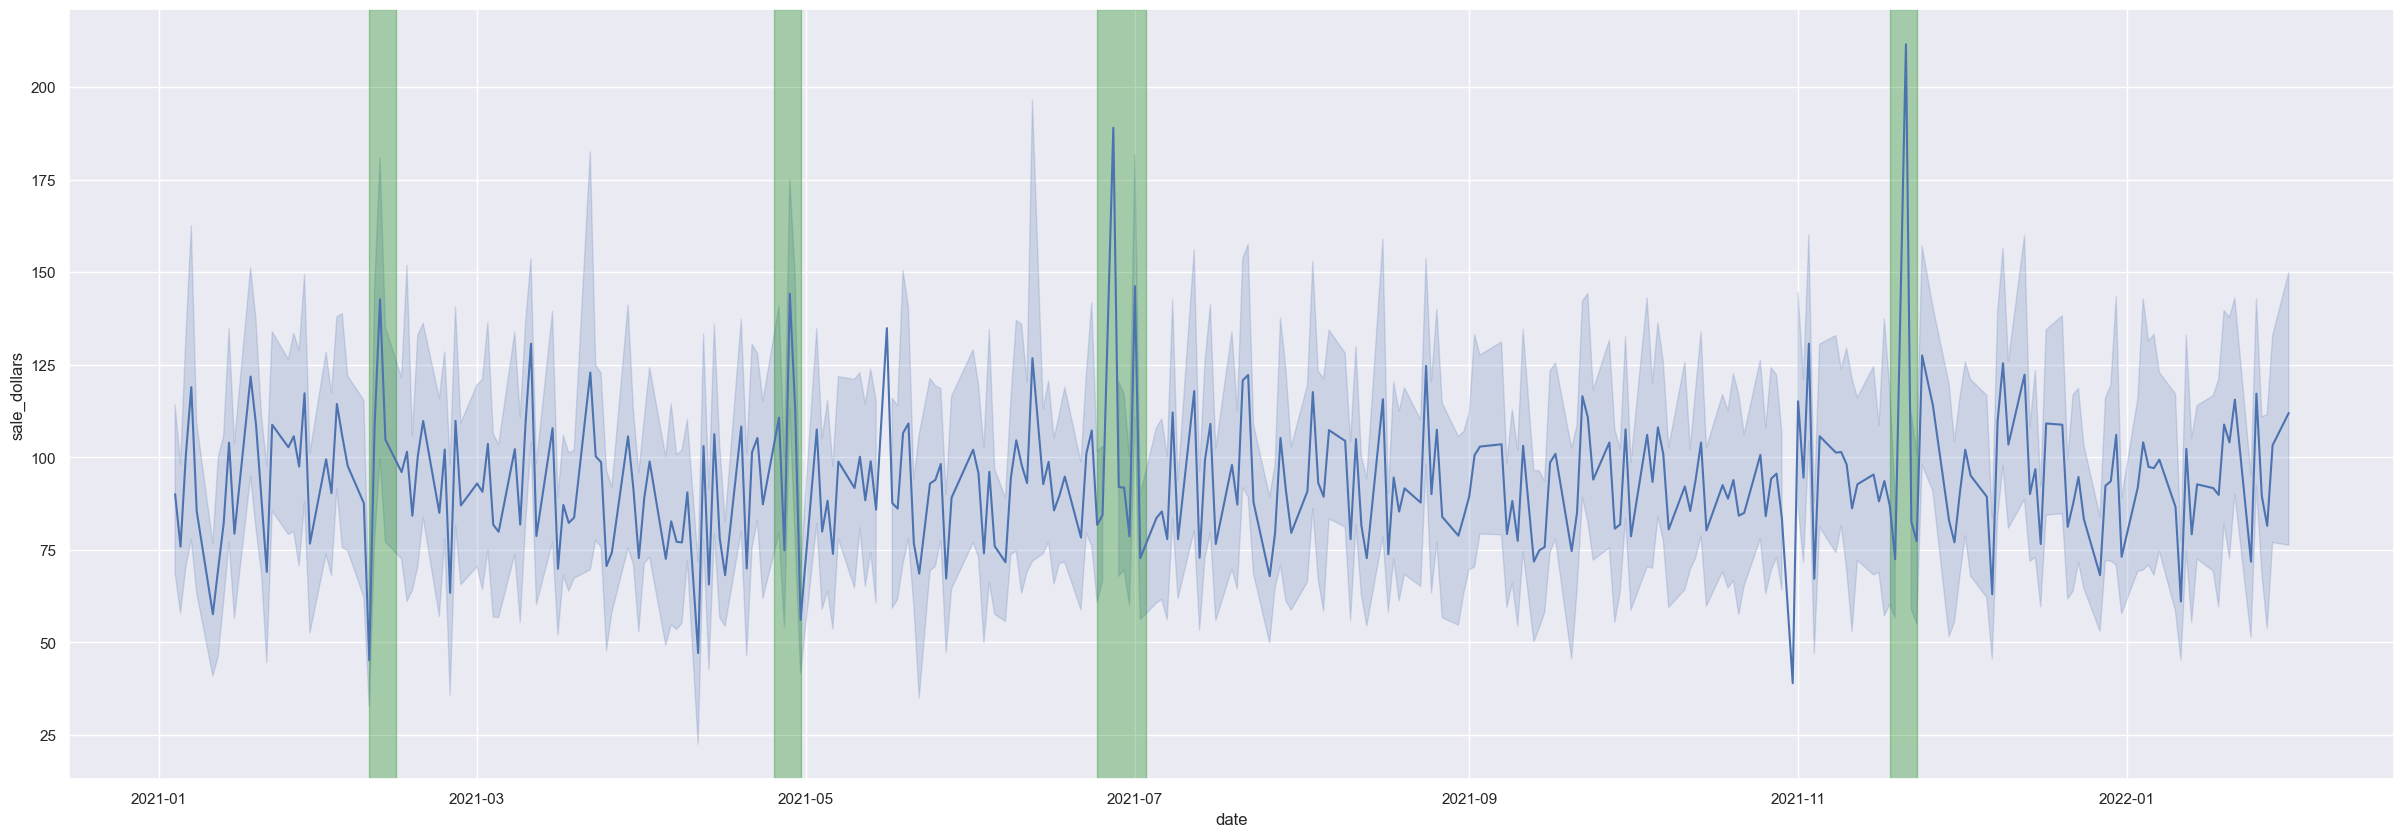

In [123]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(x="date", y="sale_dollars", data=ldf, ax=ax)
highlight_start_date1 = pd.to_datetime('2021-02-09')
highlight_end_date1 = pd.to_datetime('2021-02-14')
plt.axvspan(highlight_start_date1, highlight_end_date1, color='green', alpha=0.3)
highlight_start_date2 = pd.to_datetime('2021-04-25')
highlight_end_date2 = pd.to_datetime('2021-04-30')
plt.axvspan(highlight_start_date2, highlight_end_date2, color='green', alpha=0.3)
highlight_start_date3 = pd.to_datetime('2021-06-24')
highlight_end_date3 = pd.to_datetime('2021-07-03')
plt.axvspan(highlight_start_date3, highlight_end_date3, color='green', alpha=0.3)
highlight_start_date4 = pd.to_datetime('2021-11-18')
highlight_end_date4 = pd.to_datetime('2021-11-23')
plt.axvspan(highlight_start_date4, highlight_end_date4, color='green', alpha=0.3)
plt.show()

There are notable spikes in liquor sales across Iowa around the end of August, the first week of October, and around November 10.  
These spikes in sales are most likely the result of events such as the Iowa State Fair, Halloween, Octoberfest, and Veterans Day.

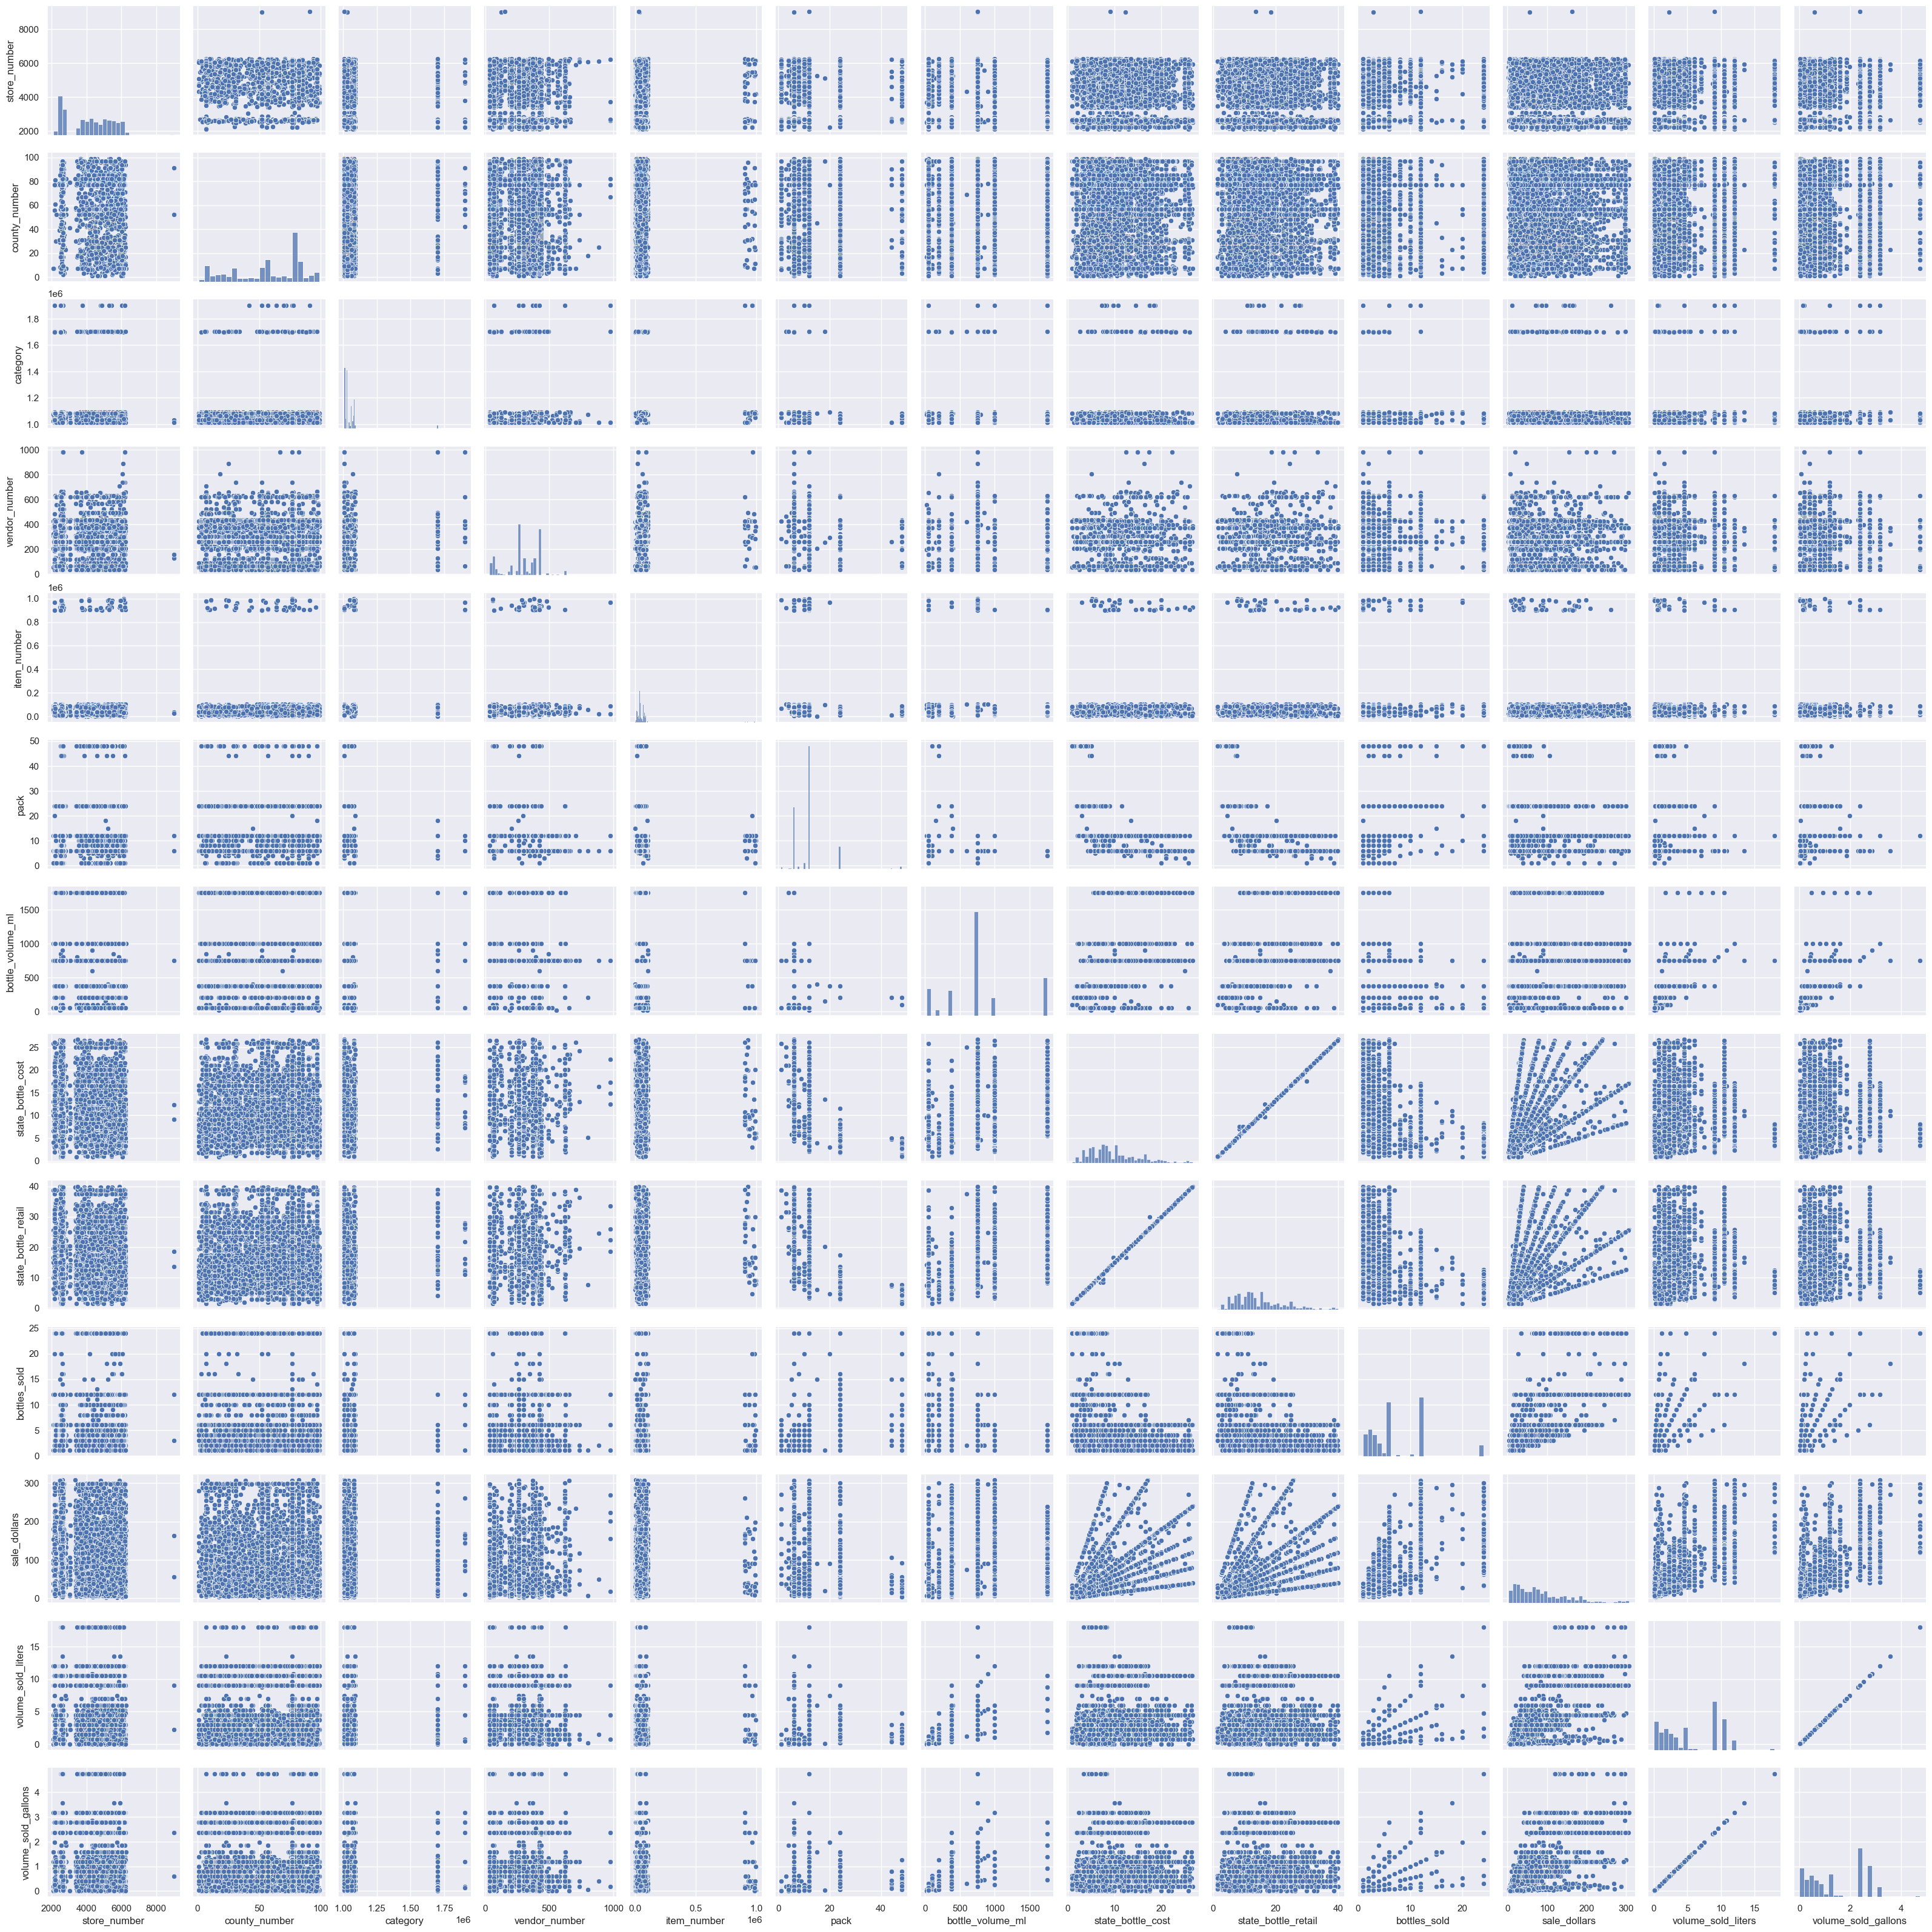

In [90]:
sns.pairplot(ldf)

#### Which cities in Iowa have the highest liquor sales per capita?

<Axes: xlabel='city', ylabel='sale_dollars'>

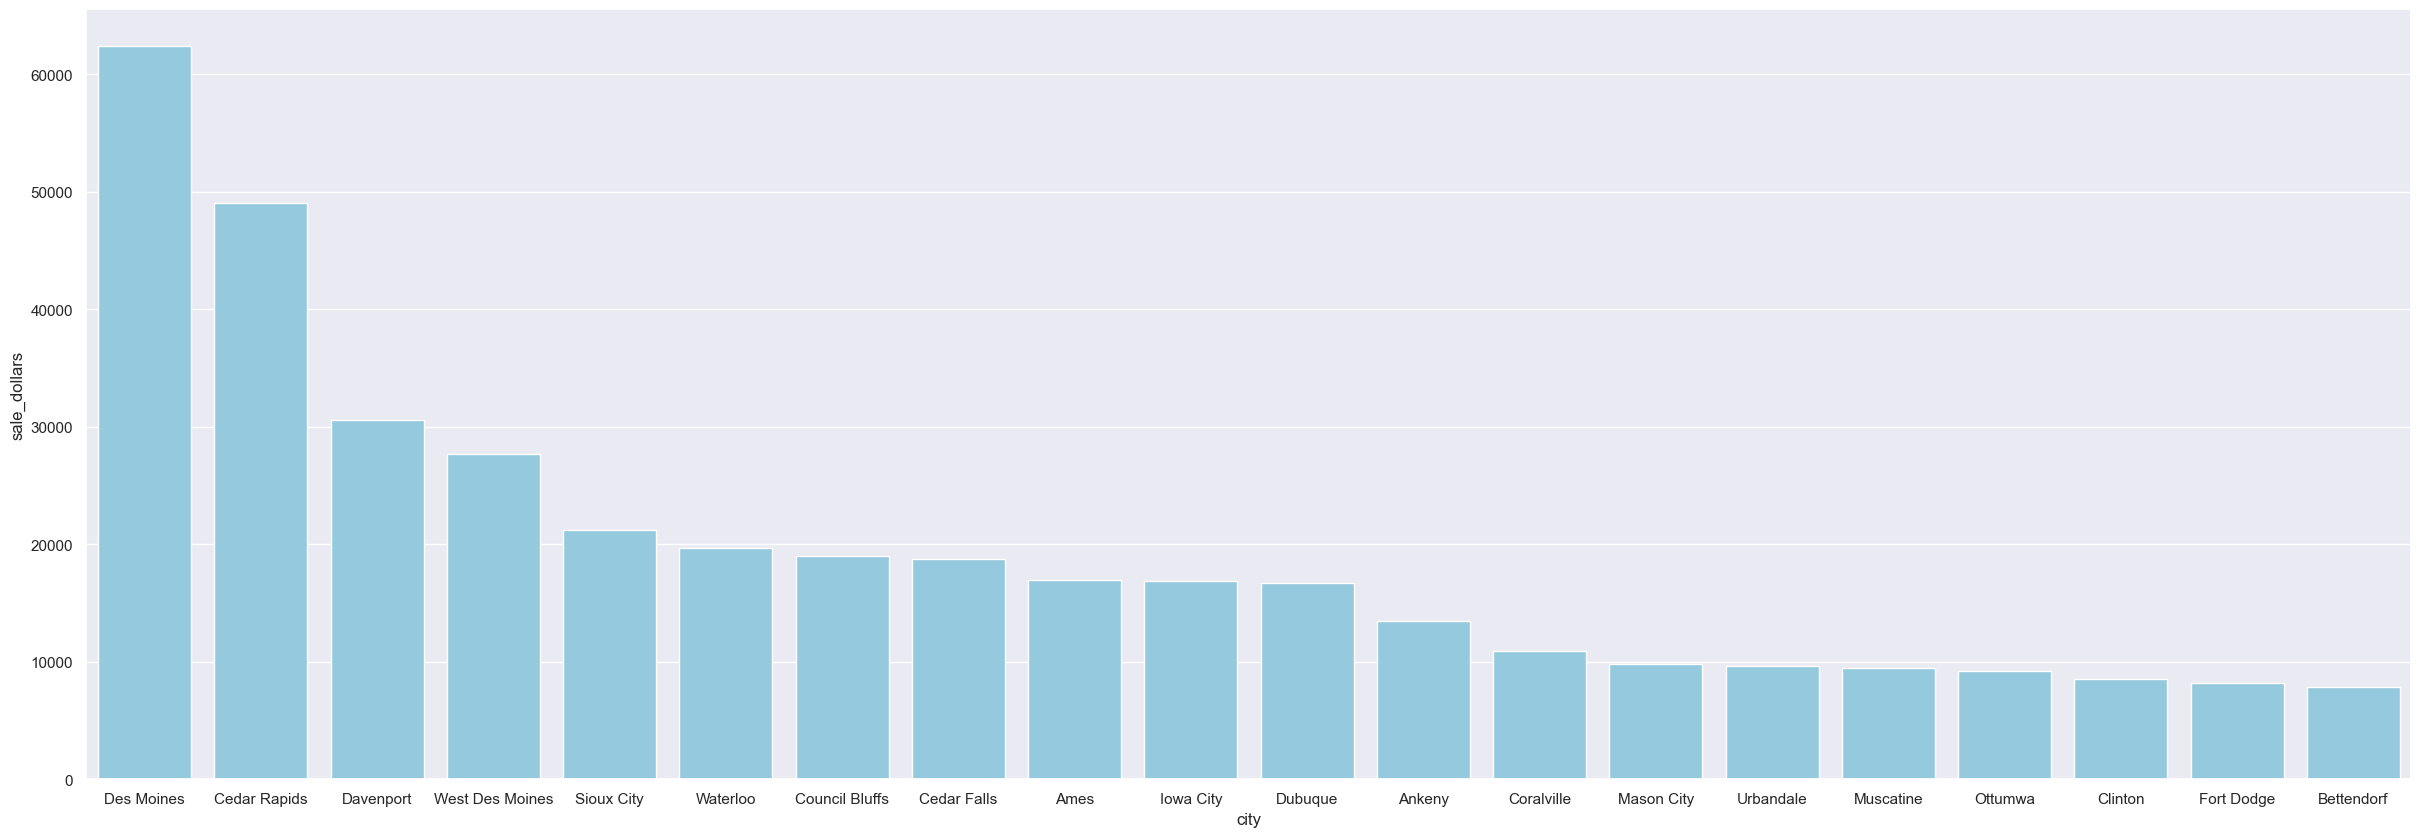

In [91]:
fig, ax = plt.subplots(figsize=(30, 10))
total_sales_per_capita = ldf.groupby(df['city']) ['sale_dollars'].sum().nlargest(20)
top_twenty_cities_by_sales = total_sales_per_capita.index
sns.barplot(data=ldf, y=total_sales_per_capita, x=top_twenty_cities_by_sales, ax=ax, color='skyblue')

#### What are the top-selling liquor brands in Iowa?

<Axes: xlabel='sale_dollars', ylabel='vendor_name'>

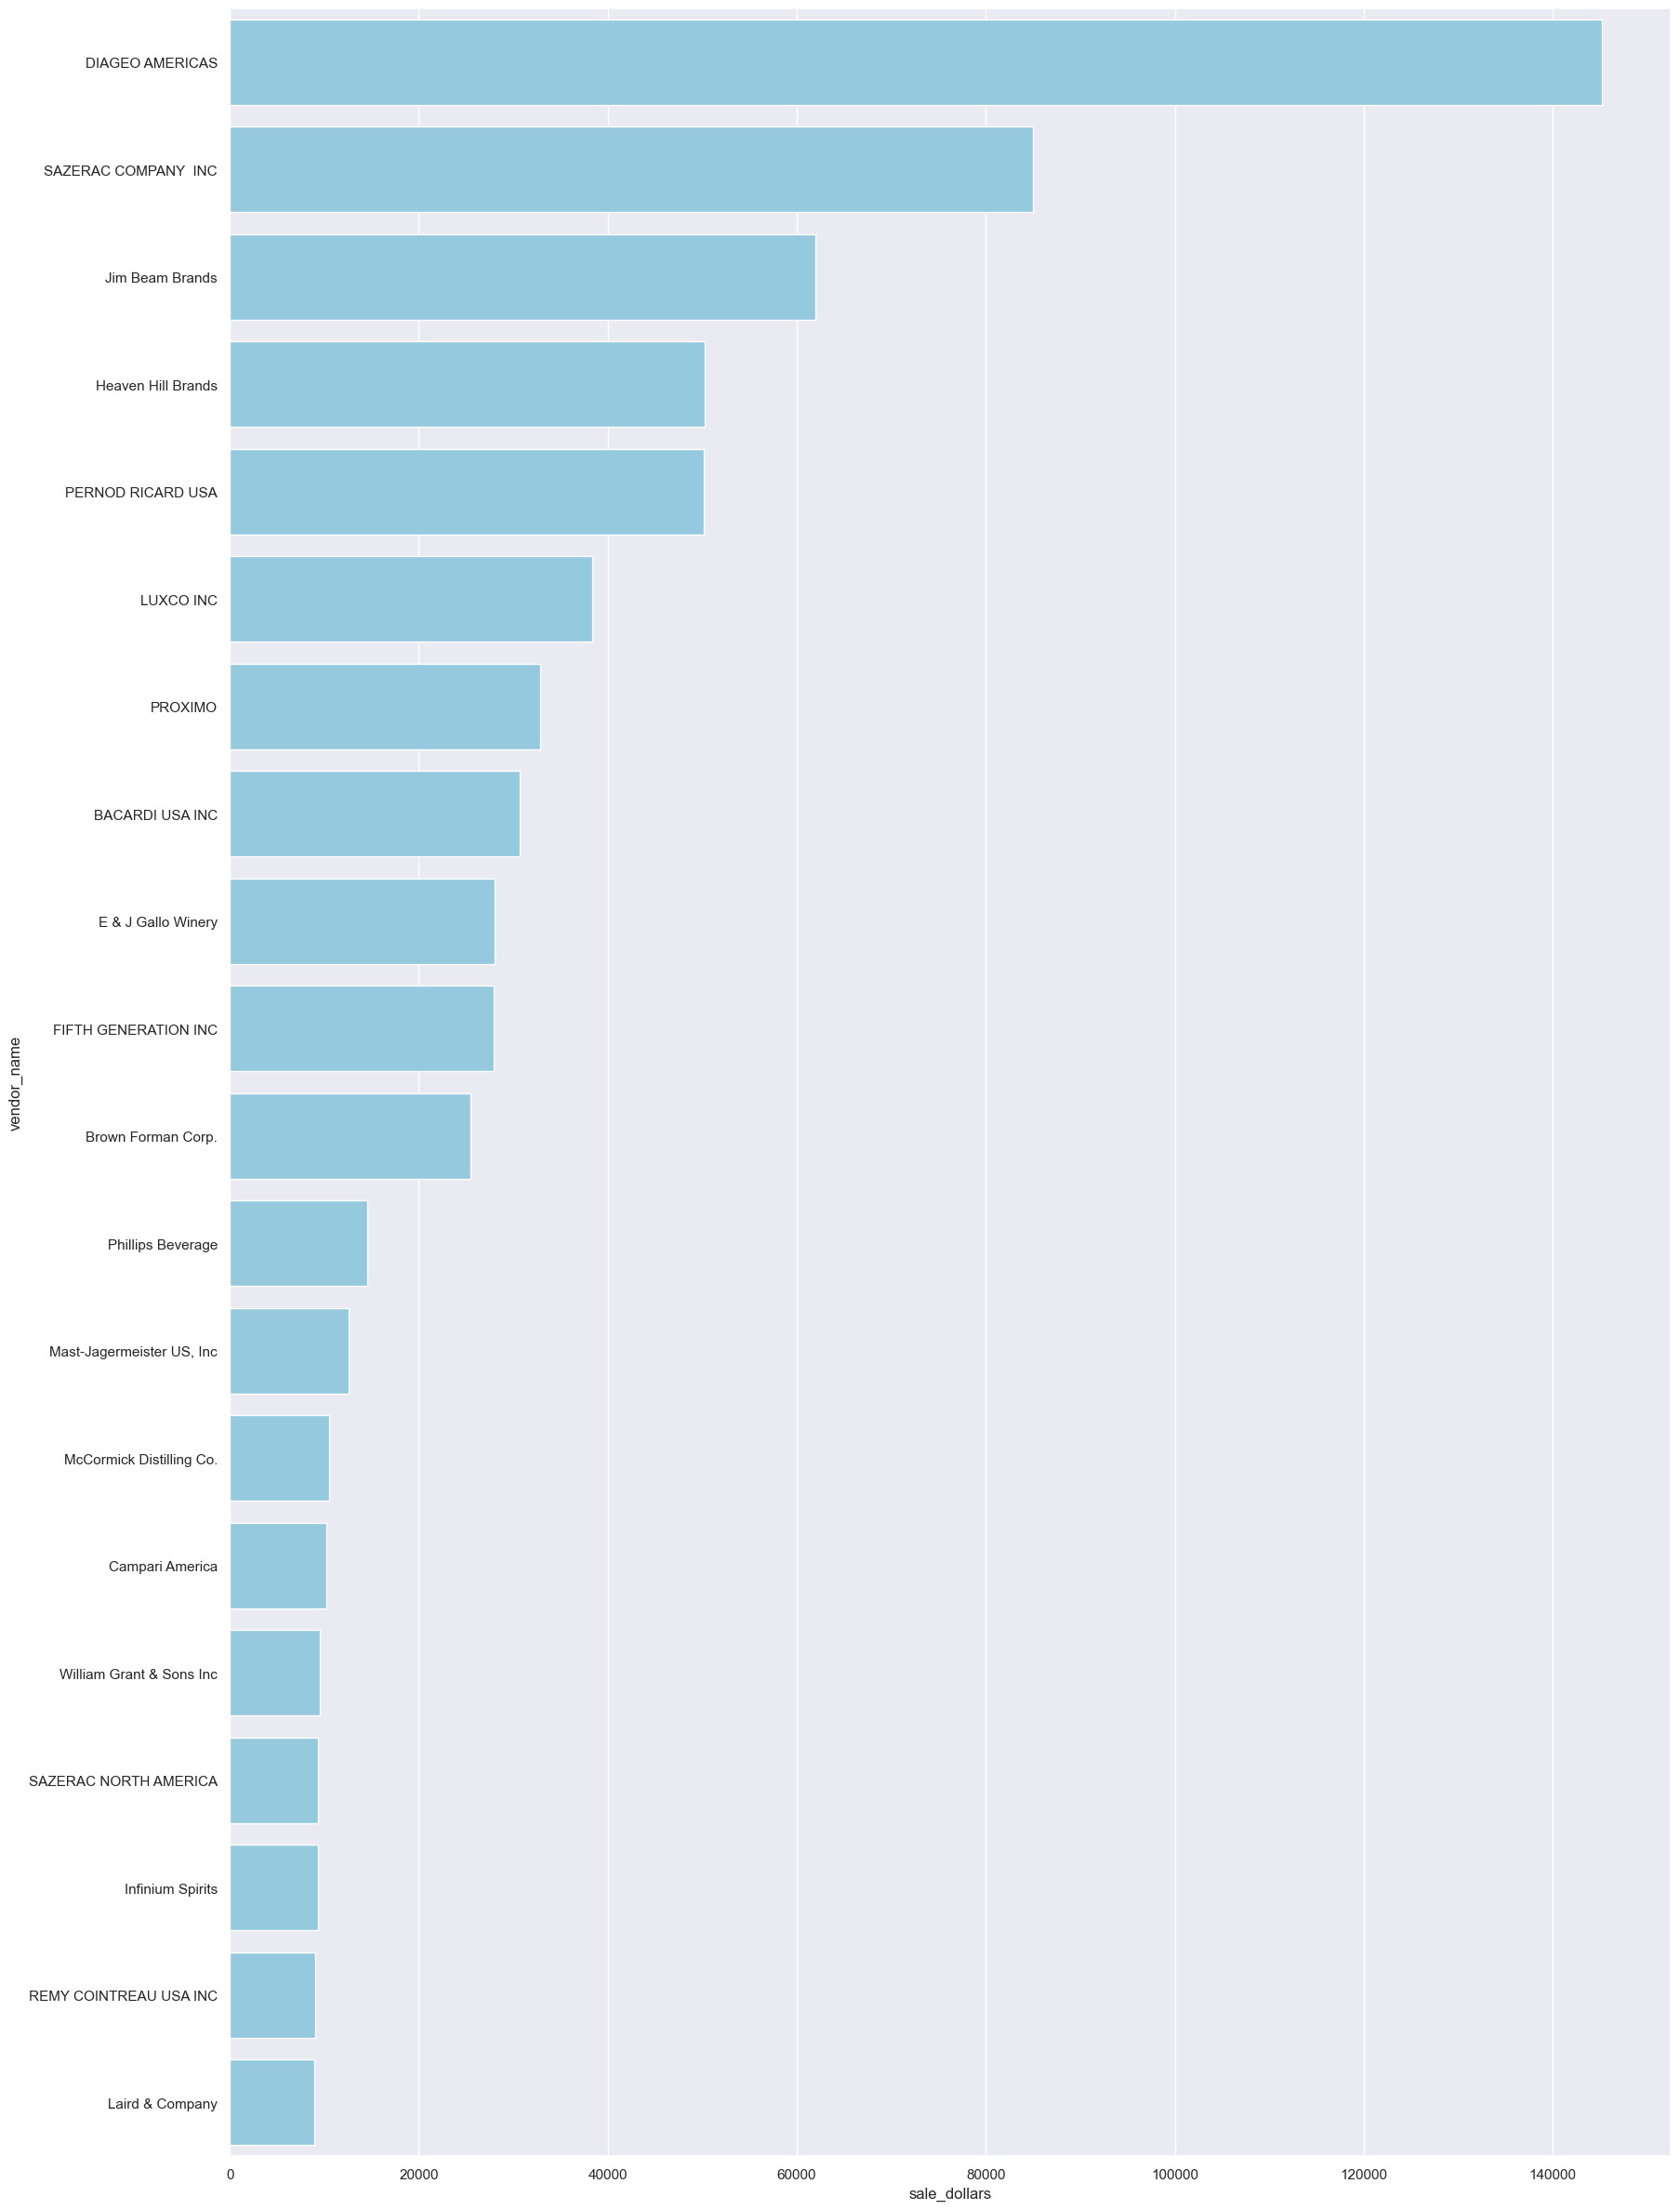

In [92]:
fig, ax = plt.subplots(figsize=(20, 30))
total_sales_per_brand = ldf.groupby(ldf['vendor_name']) ['sale_dollars'].sum().nlargest(20)
top_twenty_brands_by_sales = total_sales_per_brand.index
sns.barplot(data=ldf, x=total_sales_per_brand, y=top_twenty_brands_by_sales, ax=ax, color='skyblue')

#### How do pricing strategies (state bottle cost vs. state bottle retail) impact liquor sales and profitability?

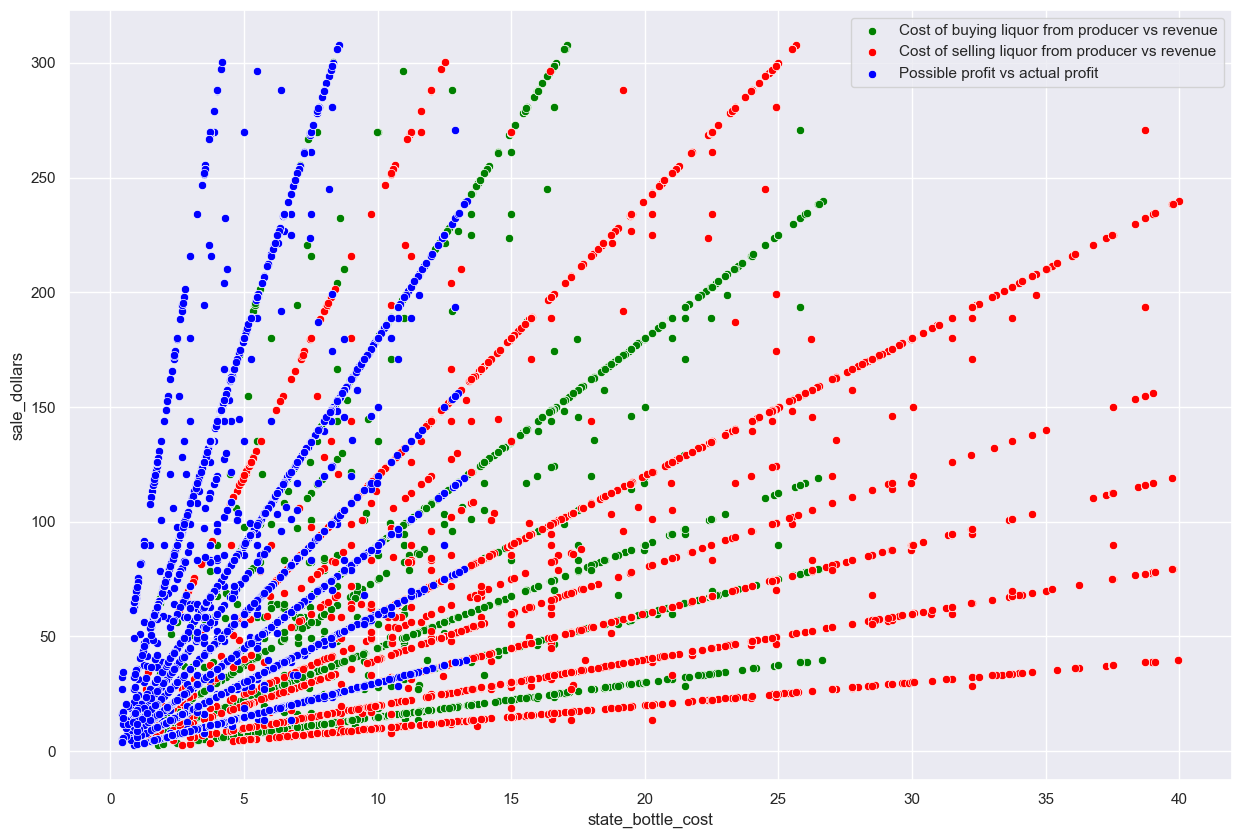

In [93]:
plt.figure(figsize=(15,10))
possible_gross_profit = ldf['state_bottle_retail'] - ldf['state_bottle_cost']
sns.scatterplot(x='state_bottle_cost', y='sale_dollars', data=ldf, label='Cost of buying liquor from producer vs revenue', color='green')
sns.scatterplot(x='state_bottle_retail', y='sale_dollars', data=ldf, label='Cost of selling liquor from producer vs revenue', color='red')
sns.scatterplot(x=possible_gross_profit, y=ldf['sale_dollars'], label='Possible profit vs actual profit', color='blue')
plt.legend()
plt.show()

#### What is the average transaction size (in terms of bottles sold and sale dollars) for liquor purchases in Iowa?

In [94]:
ldf['sale_dollars'].mean()

92.62458405332015

In [95]:
ldf['bottles_sold'].sum()/df['bottles_sold'].count()

6.11786755518534

The cost of the average transaction is $93 involving 6 liquor bottles.

#### What are the most profitable pack sizes (number of bottles in a case) for liquor products in Iowa?

<Axes: xlabel='pack', ylabel='sale_dollars'>

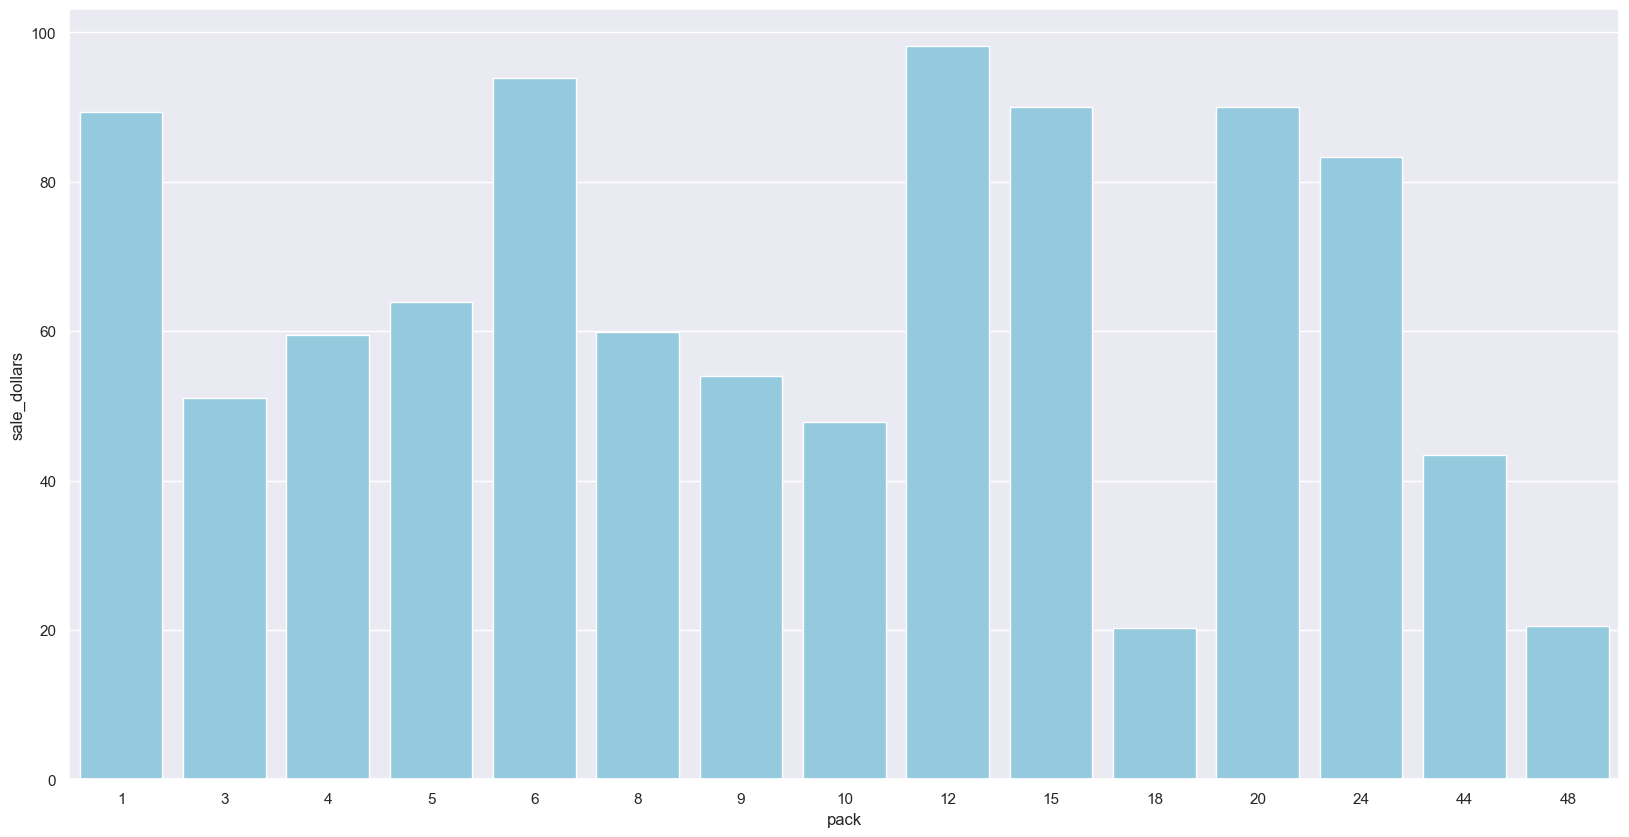

In [96]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_sales_per_pack = ldf.groupby(ldf['pack']) ['sale_dollars'].mean().nlargest(20)
top_twenty_packs_by_sales = mean_sales_per_pack.index
sns.barplot(data=ldf, y=mean_sales_per_pack, x=top_twenty_packs_by_sales, ax=ax, color='skyblue')

#### The distribution of pack sizes (number of bottles in a case) for liquor products in Iowa.

<Axes: >

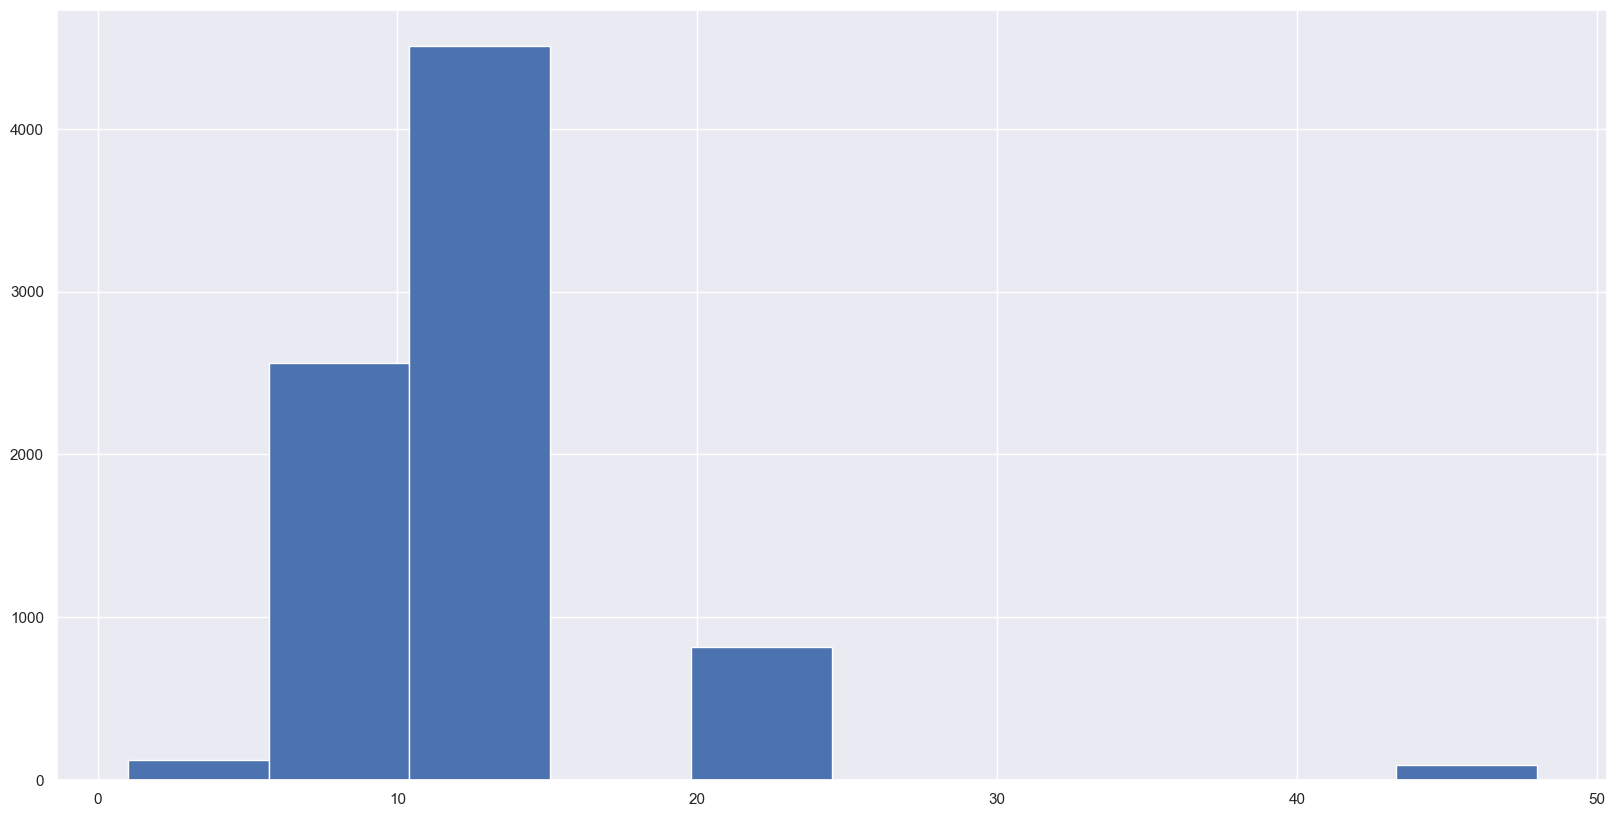

In [97]:
ldf.pack.hist(figsize=(20,10))

<Axes: >

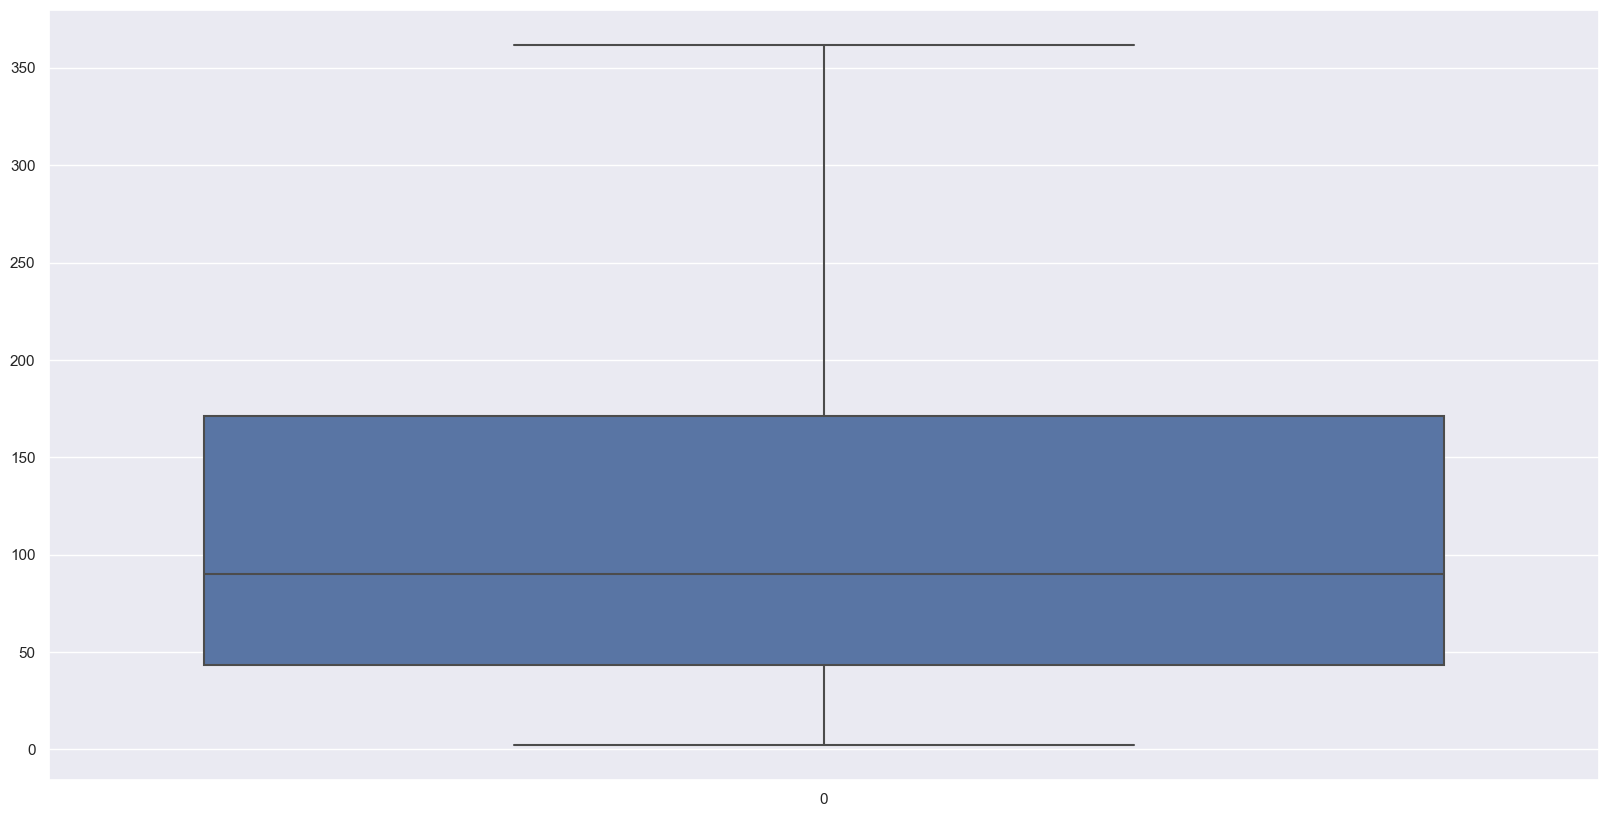

In [225]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['sale_dollars'], ax=ax, showfliers=False)

In [98]:
np.corrcoef(ldf['sale_dollars'],ldf.pack)

array([[ 1.        , -0.07875539],
       [-0.07875539,  1.        ]])

In [99]:
round(np.corrcoef(ldf['sale_dollars'],ldf.pack)[1][0],2)

-0.08

<Axes: >

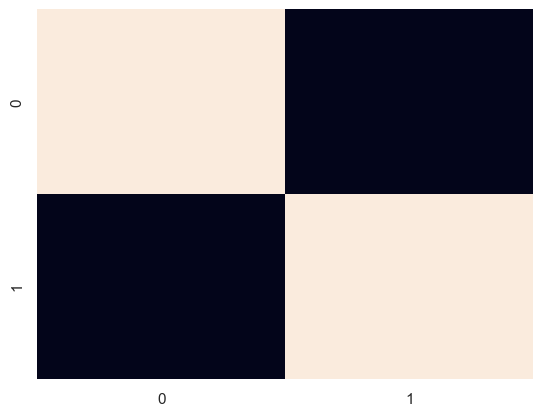

In [108]:
sns.heatmap(np.corrcoef(ldf['sale_dollars'],ldf.pack),cbar=False)
sns.heatmap(np.corrcoef(ldf['sale_dollars'],ldf['bottles_sold']),cbar=False)
sns.heatmap(np.corrcoef(ldf['sale_dollars'],ldf['volume_sold_liters']),cbar=False)
sns.heatmap(np.corrcoef(ldf['sale_dollars'],ldf['state_bottle_cost']),cbar=False)
sns.heatmap(np.corrcoef(ldf['sale_dollars'],ldf['state_bottle_retail']),cbar=False)